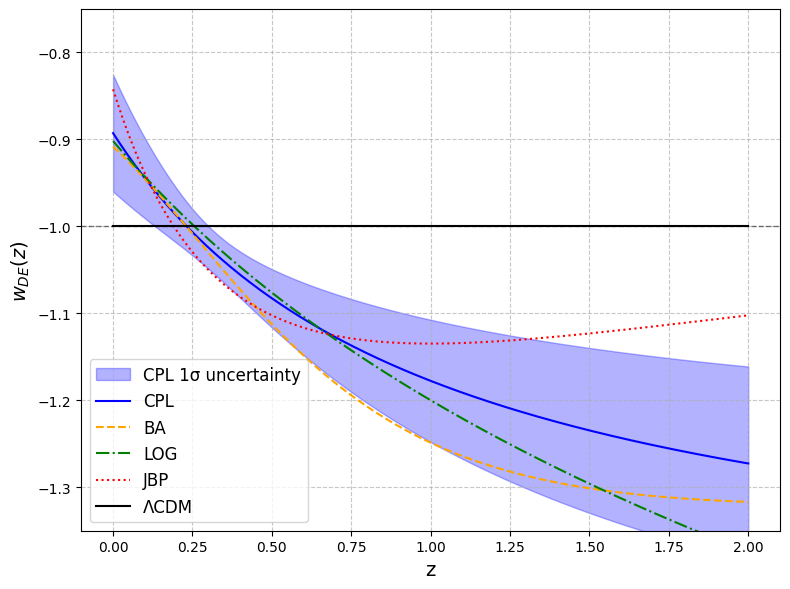

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# Redshift range
z = np.linspace(0.0, 2.0, 400)

# Parametrizations with NEW best-fit (w0, wa) for gamma_a=0 case
parametrizations = {
    "CPL": {
        "w0": -0.892741,
        "wa": -0.569866,
        "func": lambda z, w0, wa: w0 + wa * z / (1.0 + z),
    },
    "BA": {
        "w0": -0.90819,
        "wa": -0.340602,
        "func": lambda z, w0, wa: w0 + wa * z * (1.0 + z) / (1.0 + z**2),
    },
    "LOG": {
        "w0": -0.901835,
        "wa": -0.430136,
        "func": lambda z, w0, wa: w0 + wa * np.log(1.0 + z),
    },
    "JBP": {
        "w0": -0.842402,
        "wa": -1.16961,
        "func": lambda z, w0, wa: w0 + wa * z / (1.0 + z)**2,
    },
    "ΛCDM": {
        "w0": -1.0,
        "wa": 0.0,
        "func": lambda z, w0, wa: w0 + 0*z,
    },
}

# Covariance matrix for CPL (w0, wa)  (CovMarginalw, gamma_a=0 case)
cov_cpl = np.array([
    [0.00451259, -0.0161022 ],
    [-0.0161022,  0.066138 ]
])

# Function to compute CPL error
def w_cpl_error(z, cov):
    grad_w0 = np.ones_like(z)
    grad_wa = z / (1 + z)
    variance = np.zeros_like(z)
    for i in range(len(z)):
        grad = np.array([grad_w0[i], grad_wa[i]])
        variance[i] = grad @ cov @ grad
    return np.sqrt(variance)

# Compute CPL central curve and error
w_cpl_central = parametrizations["CPL"]["func"](
    z,
    parametrizations["CPL"]["w0"],
    parametrizations["CPL"]["wa"]
)
w_cpl_error_vals = w_cpl_error(z, cov_cpl)

# --- PLOT ---
plt.figure(figsize=(8, 6))

colors = {"LOG": "green", "CPL": "blue", "BA": "orange", "JBP": "red", "ΛCDM": "black"}
styles = {"LOG": "dashdot", "CPL": "solid", "BA": "dashed", "JBP": "dotted", "ΛCDM": "solid"}

for name, p in parametrizations.items():
    if name == "CPL":
        plt.fill_between(
            z,
            w_cpl_central - w_cpl_error_vals,
            w_cpl_central + w_cpl_error_vals,
            color=colors[name], alpha=0.3, label=f"{name} 1σ uncertainty"
        )
        plt.plot(
            z, w_cpl_central, label=name,
            color=colors[name], linestyle=styles[name], linewidth=1.5
        )
    else:
        w_of_z = p["func"](z, p["w0"], p["wa"])
        plt.plot(
            z, w_of_z, label=name,
            color=colors[name], linestyle=styles[name], linewidth=1.5
        )

plt.axhline(-1, color="black", linestyle="dashed", linewidth=1, alpha=0.5)
plt.xlabel("z", fontsize=14)
plt.ylabel(r"$w_{DE}(z)$", fontsize=14)
plt.grid(True, linestyle="--", alpha=0.7)
plt.legend(fontsize=12, loc="lower left", frameon=True)
plt.ylim(-1.35, -0.75)
plt.tight_layout()
plt.show()

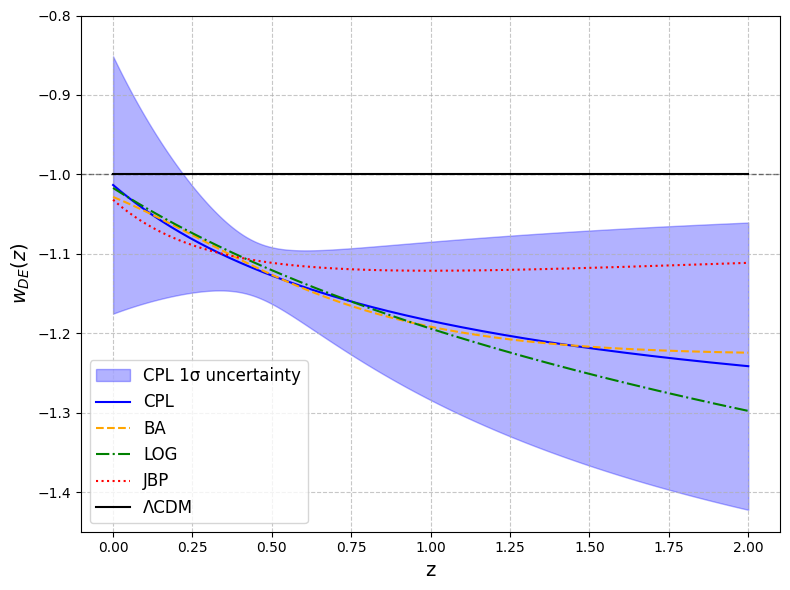

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# Redshift range
z = np.linspace(0.0, 2.0, 400)

# New best-fit parameters for all models (from your latest values)
parametrizations = {
    "CPL": {
        "w0": -1.01341,
        "wa": -0.342229,
        "func": lambda z, w0, wa: w0 + wa * z / (1.0 + z),
    },
    "BA": {
        "w0": -1.02846,
        "wa": -0.163445,
        "func": lambda z, w0, wa: w0 + wa * z * (1.0 + z) / (1.0 + z**2),
    },
    "LOG": {
        "w0": -1.01715,
        "wa": -0.255526,
        "func": lambda z, w0, wa: w0 + wa * np.log(1.0 + z),
    },
    "JBP": {
        "w0": -1.03197,
        "wa": -0.357571,
        "func": lambda z, w0, wa: w0 + wa * z / (1.0 + z)**2,
    },
    "ΛCDM": {
        "w0": -1.0,
        "wa": 0.0,
        "func": lambda z, w0, wa: w0 + 0*z,
    },
}

# Correct Covariance matrix for CPL (w0, wa) -- from your latest covmarginalw
cov_cpl = np.array([
    [0.0262516, -0.0797778],   # [Var(w0), Cov(w0,wa)]
    [-0.0797778, 0.253849]     # [Cov(wa,w0), Var(wa)]
])

# Function to compute CPL error
def w_cpl_error(z, cov):
    grad_w0 = np.ones_like(z)
    grad_wa = z / (1 + z)
    variance = np.zeros_like(z)
    for i in range(len(z)):
        grad = np.array([grad_w0[i], grad_wa[i]])
        variance[i] = grad @ cov @ grad
    return np.sqrt(variance)

# Compute CPL central curve and error
w_cpl_central = parametrizations["CPL"]["func"](
    z,
    parametrizations["CPL"]["w0"],
    parametrizations["CPL"]["wa"]
)
w_cpl_error_vals = w_cpl_error(z, cov_cpl)

# --- PLOT ---
plt.figure(figsize=(8, 6))

colors = {"LOG": "green", "CPL": "blue", "BA": "orange", "JBP": "red", "ΛCDM": "black"}
styles = {"LOG": "dashdot", "CPL": "solid", "BA": "dashed", "JBP": "dotted", "ΛCDM": "solid"}

for name, p in parametrizations.items():
    if name == "CPL":
        plt.fill_between(
            z,
            w_cpl_central - w_cpl_error_vals,
            w_cpl_central + w_cpl_error_vals,
            color=colors[name], alpha=0.3, label=f"{name} 1σ uncertainty"
        )
        plt.plot(
            z, w_cpl_central, label=name,
            color=colors[name], linestyle=styles[name], linewidth=1.5
        )
    else:
        w_of_z = p["func"](z, p["w0"], p["wa"])
        plt.plot(
            z, w_of_z, label=name,
            color=colors[name], linestyle=styles[name], linewidth=1.5
        )

plt.axhline(-1, color="black", linestyle="dashed", linewidth=1, alpha=0.5)
plt.xlabel("z", fontsize=14)
plt.ylabel(r"$w_{DE}(z)$", fontsize=14)
plt.grid(True, linestyle="--", alpha=0.7)
plt.legend(fontsize=12, loc="lower left", frameon=True)
plt.ylim(-1.45, -.8)
plt.tight_layout()
plt.show()

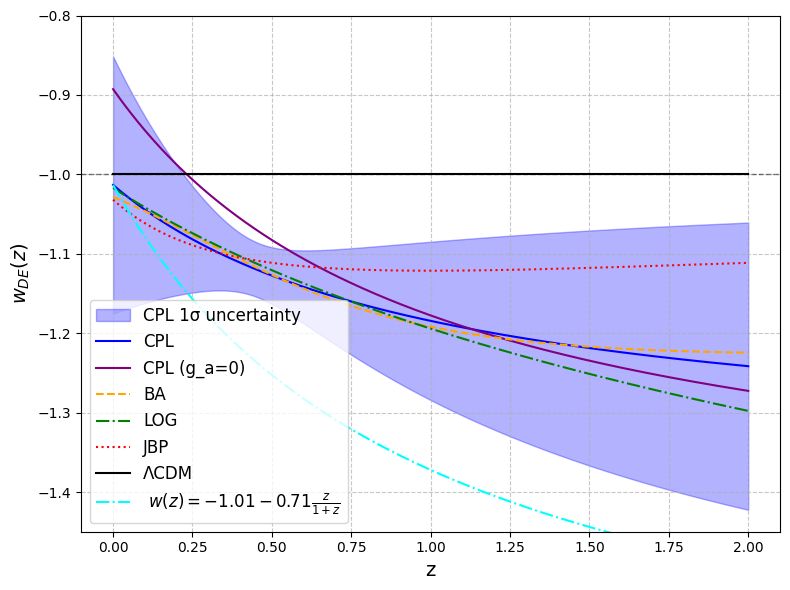

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# Redshift range
z = np.linspace(0.0, 2.0, 400)

# New best-fit parameters for all models, including new CPL (g_a=0)
parametrizations = {
    "CPL": {
        "w0": -1.01341,
        "wa": -0.342229,
        "func": lambda z, w0, wa: w0 + wa * z / (1.0 + z),
    },
    "CPL (g_a=0)": {
        "w0": -0.892741,
        "wa": -0.569866,
        "func": lambda z, w0, wa: w0 + wa * z / (1.0 + z),
    },
    "BA": {
        "w0": -1.02846,
        "wa": -0.163445,
        "func": lambda z, w0, wa: w0 + wa * z * (1.0 + z) / (1.0 + z**2),
    },
    "LOG": {
        "w0": -1.01715,
        "wa": -0.255526,
        "func": lambda z, w0, wa: w0 + wa * np.log(1.0 + z),
    },
    "JBP": {
        "w0": -1.03197,
        "wa": -0.357571,
        "func": lambda z, w0, wa: w0 + wa * z / (1.0 + z)**2,
    },
    "ΛCDM": {
        "w0": -1.0,
        "wa": 0.0,
        "func": lambda z, w0, wa: w0 + 0*z,
    },
    "Custom": {
        "w0": -1.01341,
        "wa": -0.717612,
        "func": lambda z, w0, wa: w0 + wa * (z / (1.0 + z)),  # w(z) = w0 + wa*(z/(1+z))
    },
}

# Correct Covariance matrix for CPL (w0, wa)
cov_cpl = np.array([
    [0.0262516, -0.0797778],   # [Var(w0), Cov(w0,wa)]
    [-0.0797778, 0.253849]     # [Cov(wa,w0), Var(wa)]
])

# Function to compute CPL error
def w_cpl_error(z, cov):
    grad_w0 = np.ones_like(z)
    grad_wa = z / (1 + z)
    variance = np.zeros_like(z)
    for i in range(len(z)):
        grad = np.array([grad_w0[i], grad_wa[i]])
        variance[i] = grad @ cov @ grad
    return np.sqrt(variance)

# Compute CPL central curve and error
w_cpl_central = parametrizations["CPL"]["func"](
    z,
    parametrizations["CPL"]["w0"],
    parametrizations["CPL"]["wa"]
)
w_cpl_error_vals = w_cpl_error(z, cov_cpl)

# --- PLOT ---
plt.figure(figsize=(8, 6))

colors = {
    "LOG": "green",
    "CPL": "blue",
    "CPL (g_a=0)": "purple",
    "BA": "orange",
    "JBP": "red",
    "ΛCDM": "black",
    "Custom": "cyan"
}
styles = {
    "LOG": "dashdot",
    "CPL": "solid",
    "CPL (g_a=0)": "solid",
    "BA": "dashed",
    "JBP": "dotted",
    "ΛCDM": "solid",
    "Custom": "dashdot"
}

for name, p in parametrizations.items():
    if name == "CPL":
        plt.fill_between(
            z,
            w_cpl_central - w_cpl_error_vals,
            w_cpl_central + w_cpl_error_vals,
            color=colors[name], alpha=0.3, label=f"{name} 1σ uncertainty"
        )
        plt.plot(
            z, w_cpl_central, label=name,
            color=colors[name], linestyle=styles[name], linewidth=1.5
        )
    else:
        w_of_z = p["func"](z, p["w0"], p["wa"])
        if name == "Custom":
            plt.plot(
                z, w_of_z, label=r" $w(z) = -1.01 -0.71 \frac{z}{1+z}$",
                color=colors[name], linestyle=styles[name], linewidth=1.5
            )
        else:
            plt.plot(
                z, w_of_z, label=name,
                color=colors[name], linestyle=styles[name], linewidth=1.5
            )

plt.axhline(-1, color="black", linestyle="dashed", linewidth=1, alpha=0.5)
plt.xlabel("z", fontsize=14)
plt.ylabel(r"$w_{DE}(z)$", fontsize=14)
plt.grid(True, linestyle="--", alpha=0.7)
plt.legend(fontsize=12, loc="lower left", frameon=True)
plt.ylim(-1.45, -0.8)
plt.tight_layout()
plt.show()

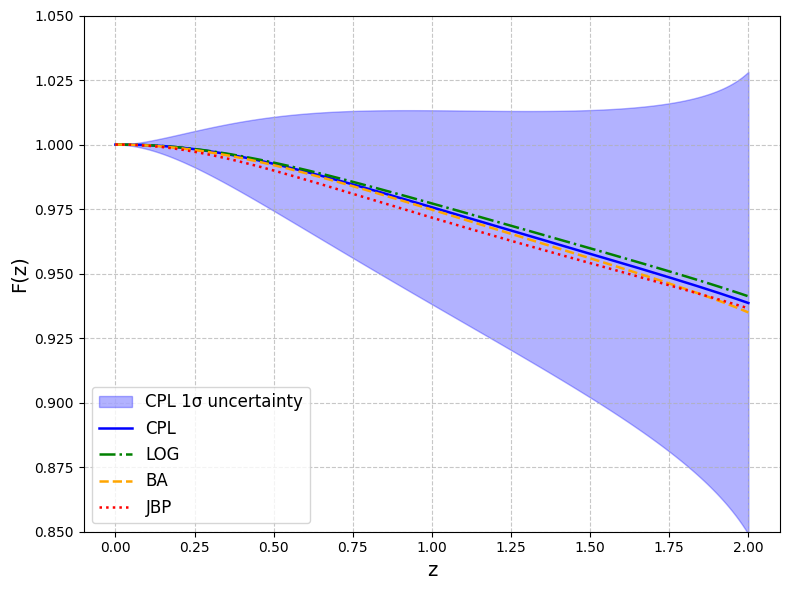

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import solve_ivp
from scipy.interpolate import interp1d

# --------------------------------------------------------------------------------
# Settings
# --------------------------------------------------------------------------------
n = 2                  # exponent in muG
z_eval = np.linspace(0.0, 2.0, 200)

# --------------------------------------------------------------------------------
# Best-fit parameters (NEW) for each model
# --------------------------------------------------------------------------------
params = {
    "CPL": {
        "M": -19.3374,
        "om": 0.286253,
        "obh2": 0.0223,
        "w0": -1.01341,
        "wa": -0.342229,
        "ga": 0.322089,
        "σ8": 0.780831,
        "h": 0.705644
    },
    "LOG": {
        "M": -19.3388,
        "om": 0.286815,
        "obh2": 0.0223,
        "w0": -1.01715,
        "wa": -0.255526,
        "ga": 0.311666,
        "σ8": 0.781457,
        "h": 0.705222
    },
    "BA": {
        "M": -19.3378,
        "om": 0.286084,
        "obh2": 0.0223,
        "w0": -1.02846,
        "wa": -0.163445,
        "ga": 0.321522,
        "σ8": 0.780939,
        "h": 0.705802
    },
    "JBP": {
        "M": -19.3337,
        "om": 0.283648,
        "obh2": 0.022493,
        "w0": -1.03197,
        "wa": -0.357571,
        "ga": 0.347624,
        "σ8": 0.781186,
        "h": 0.707511
    }
}

# --------------------------------------------------------------------------------
# CPL full covariance (om, w0, wa, ga)  (CovMarginal)
# --------------------------------------------------------------------------------
cov_cpl = np.array([
    [0.000215636,  0.00226876,  -0.00661639, -0.00281314],
    [0.00226876,   0.0262516,   -0.0797778,  -0.0307732],
    [-0.00661639, -0.0797778,    0.253849,    0.0894571],
    [-0.00281314, -0.0307732,    0.0894571,   0.0435601]
])

# --------------------------------------------------------------------------------
# Helper: central derivative (custom)
# --------------------------------------------------------------------------------
def derivative(func, x, dx=1e-5):
    return (func(x + dx) - func(x - dx)) / (2.0 * dx)

# --------------------------------------------------------------------------------
# μG
# --------------------------------------------------------------------------------
def muG(z, ga):
    x = z / (1.0 + z)
    return 1.00002 + ga * x**n - ga * x**(2 * n)

# --------------------------------------------------------------------------------
# Dark energy evolution factors
# --------------------------------------------------------------------------------
def f_CPL(z, w0, wa):
    return np.exp(-(3 * wa * z) / (1 + z)) * (1 + z)**(3 * (1 + w0 + wa))

def f_LOG(z, w0, wa):
    return (1 + z)**(3 + 3 * w0 + 1.5 * wa * np.log(1 + z))

def f_BA(z, w0, wa):
    return (1 + z)**(3 + 3 * w0) * (1 + z**2)**(1.5 * wa)

def f_JBP(z, w0, wa):
    return np.exp((3 * wa * z**2) / (2 * (1 + z)**2)) * (1 + z)**(3 + 3 * w0)

# --------------------------------------------------------------------------------
# q(z) = H^2/H0^2 for each model
# --------------------------------------------------------------------------------
def q_CPL(z, om, w0, wa): return om * (1 + z)**3 + (1 - om) * f_CPL(z, w0, wa)
def q_LOG(z, om, w0, wa): return om * (1 + z)**3 + (1 - om) * f_LOG(z, w0, wa)
def q_BA (z, om, w0, wa): return om * (1 + z)**3 + (1 - om) * f_BA (z, w0, wa)
def q_JBP(z, om, w0, wa): return om * (1 + z)**3 + (1 - om) * f_JBP(z, w0, wa)

def q1_CPL(z, om, w0, wa): return derivative(lambda zz: q_CPL(zz, om, w0, wa), z)
def q1_LOG(z, om, w0, wa): return derivative(lambda zz: q_LOG(zz, om, w0, wa), z)
def q1_BA (z, om, w0, wa): return derivative(lambda zz: q_BA (zz, om, w0, wa), z)
def q1_JBP(z, om, w0, wa): return derivative(lambda zz: q_JBP(zz, om, w0, wa), z)

# --------------------------------------------------------------------------------
# ODE for F(z)
# --------------------------------------------------------------------------------
def F_ode(z, y, model, om, w0, wa, ga):
    F, Fp = y
    if model == "CPL":
        qv, q1v = q_CPL(z, om, w0, wa), q1_CPL(z, om, w0, wa)
    elif model == "LOG":
        qv, q1v = q_LOG(z, om, w0, wa), q1_LOG(z, om, w0, wa)
    elif model == "BA":
        qv, q1v = q_BA(z, om, w0, wa), q1_BA(z, om, w0, wa)
    else:
        qv, q1v = q_JBP(z, om, w0, wa), q1_JBP(z, om, w0, wa)

    mu = muG(z, ga)
    Fpp = -(2/(1+z) + q1v/(2*qv)) * Fp
    Fpp += (q1v/(qv*(1+z))) * F
    Fpp -= (3*(1+z)/qv) * om
    Fpp -= (Fp**2 * (4 - 3*mu*F)) / (2*F*(mu*F - 1))
    return [Fp, Fpp]

# --------------------------------------------------------------------------------
# Solve F(z)
# --------------------------------------------------------------------------------
def solve_F(model, om, w0, wa, ga, z_grid):
    y0 = [1.0, 0.0]
    sol = solve_ivp(
        lambda z, y: F_ode(z, y, model, om, w0, wa, ga),
        [z_grid[0], z_grid[-1]],
        y0,
        t_eval=z_grid,
        method='BDF',
        rtol=1e-8,
        atol=1e-10
    )
    if not sol.success:
        raise RuntimeError(f"ODE failed for {model}: {sol.message}")
    return sol.y[0]

# --------------------------------------------------------------------------------
# Compute central F(z) for all models
# --------------------------------------------------------------------------------
F_models = {}
for model in ["CPL", "LOG", "BA", "JBP"]:
    p = params[model]
    F_models[model] = solve_F(model, p["om"], p["w0"], p["wa"], p["ga"], z_eval)

# --------------------------------------------------------------------------------
# CPL uncertainty: propagate full covariance (om, w0, wa, ga)
# --------------------------------------------------------------------------------
central_cpl = [params["CPL"]["om"], params["CPL"]["w0"], params["CPL"]["wa"], params["CPL"]["ga"]]

# finite-difference step sizes (tuned)
deltas = [
    5e-5,    # om
    2e-3,    # w0
    2e-3,    # wa
    1e-3     # ga
]

def partial_derivative_F(z_idx, param_index):
    base = central_cpl.copy()
    base[param_index] += deltas[param_index]
    F_plus = solve_F("CPL", base[0], base[1], base[2], base[3], z_eval)[z_idx]
    base[param_index] -= 2*deltas[param_index]
    F_minus = solve_F("CPL", base[0], base[1], base[2], base[3], z_eval)[z_idx]
    return (F_plus - F_minus) / (2*deltas[param_index])

F_cpl = F_models["CPL"]
F_err = np.zeros_like(F_cpl)

for i in range(len(z_eval)):
    grad = np.array([partial_derivative_F(i, j) for j in range(4)])  # dF/d(om,w0,wa,ga)
    var = grad @ cov_cpl @ grad
    if var < 0:  # numerical guard
        var = 0.0
    F_err[i] = np.sqrt(var)

# --------------------------------------------------------------------------------
# Plot
# --------------------------------------------------------------------------------
plt.figure(figsize=(8, 6))
colors = {"LOG": "green", "CPL": "blue", "BA": "orange", "JBP": "red"}
styles = {"LOG": "dashdot", "CPL": "solid", "BA": "dashed", "JBP": "dotted"}

# Fill CPL band
plt.fill_between(z_eval,
                 F_cpl - F_err,
                 F_cpl + F_err,
                 color=colors["CPL"], alpha=0.30, label="CPL 1σ uncertainty")

# Central curves
for model in ["CPL", "LOG", "BA", "JBP"]:
    plt.plot(z_eval, F_models[model],
             color=colors[model],
             linestyle=styles[model],
             linewidth=1.8,
             label=model)

plt.xlabel("z", fontsize=14)
plt.ylabel("F(z)", fontsize=14)
plt.grid(True, linestyle="--", alpha=0.7)
plt.legend(fontsize=12, loc="best")
plt.ylim(0.85, 1.05)
plt.tight_layout()
plt.show()

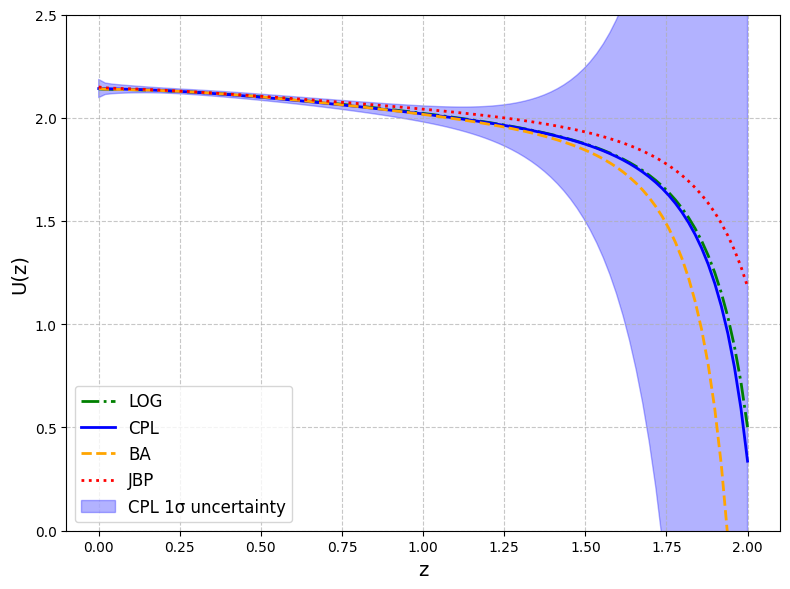

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import solve_ivp
from scipy.interpolate import interp1d

# ✅ Central-difference derivative
def derivative(func, x, dx=1e-5, n=1):
    if n == 1:
        return (func(x + dx) - func(x - dx)) / (2 * dx)
    elif n == 2:
        return (func(x + dx) - 2 * func(x) + func(x - dx)) / (dx ** 2)
    else:
        raise ValueError("Only first and second derivatives are supported.")

# --- PARAMETERS ---
n = 2
z_eval = np.linspace(0, 2, 100)

# --------------------------------------------------------------------------------
# Best-fit parameters (NEW) for each model
# --------------------------------------------------------------------------------
params = {
    "CPL": {
        "M": -19.3374,
        "om": 0.286253,
        "obh2": 0.0223,
        "w0": -1.01341,
        "wa": -0.342229,
        "ga": 0.322089,
        "σ8": 0.780831,
        "h": 0.705644
    },
    "LOG": {
        "M": -19.3388,
        "om": 0.286815,
        "obh2": 0.0223,
        "w0": -1.01715,
        "wa": -0.255526,
        "ga": 0.311666,
        "σ8": 0.781457,
        "h": 0.705222
    },
    "BA": {
        "M": -19.3378,
        "om": 0.286084,
        "obh2": 0.0223,
        "w0": -1.02846,
        "wa": -0.163445,
        "ga": 0.321522,
        "σ8": 0.780939,
        "h": 0.705802
    },
    "JBP": {
        "M": -19.3337,
        "om": 0.283648,
        "obh2": 0.022493,
        "w0": -1.03197,
        "wa": -0.357571,
        "ga": 0.347624,
        "σ8": 0.781186,
        "h": 0.707511
    }
}

# --------------------------------------------------------------------------------
# CPL full covariance (om, w0, wa, ga)  (CovMarginal)
# --------------------------------------------------------------------------------
cov_cpl = np.array([
    [0.000215636,  0.00226876,  -0.00661639, -0.00281314],
    [0.00226876,   0.0262516,   -0.0797778,  -0.0307732],
    [-0.00661639, -0.0797778,    0.253849,    0.0894571],
    [-0.00281314, -0.0307732,    0.0894571,   0.0435601]
])

# --- FUNCTIONS ---
def muG(z, ga):
    return 1.00002 + ga * (z/(1+z))**n - ga * (z/(1+z))**(2*n)

def f_CPL(z, w0, wa): return np.exp(-(3 * wa * z) / (1 + z)) * (1 + z)**(3 * (1 + w0 + wa))
def f_BA(z, w0, wa):  return (1 + z)**(3 + 3 * w0) * (1 + z**2)**(3 * wa / 2)
def f_JBP(z, w0, wa): return np.exp((3 * wa * z**2) / (2 * (1 + z)**2)) * (1 + z)**(3 + 3 * w0)
def f_LOG(z, w0, wa): return (1 + z)**(3 + 3 * w0 + (3/2) * wa * np.log(1 + z))

def q_CPL(z, om, w0, wa): return om * (1 + z)**3 + (1 - om) * f_CPL(z, w0, wa)
def q_BA(z, om, w0, wa):  return om * (1 + z)**3 + (1 - om) * f_BA(z, w0, wa)
def q_JBP(z, om, w0, wa): return om * (1 + z)**3 + (1 - om) * f_JBP(z, w0, wa)
def q_LOG(z, om, w0, wa): return om * (1 + z)**3 + (1 - om) * f_LOG(z, w0, wa)

def q1_CPL(z, om, w0, wa): return derivative(lambda x: q_CPL(x, om, w0, wa), z)
def q1_BA(z, om, w0, wa):  return derivative(lambda x: q_BA(x, om, w0, wa), z)
def q1_JBP(z, om, w0, wa): return derivative(lambda x: q_JBP(x, om, w0, wa), z)
def q1_LOG(z, om, w0, wa): return derivative(lambda x: q_LOG(x, om, w0, wa), z)

def F_ode(z, y, model, om, w0, wa, ga):
    F, Fp = y
    if model == "CPL":
        qv, q1v = q_CPL(z, om, w0, wa), q1_CPL(z, om, w0, wa)
    elif model == "BA":
        qv, q1v = q_BA(z, om, w0, wa), q1_BA(z, om, w0, wa)
    elif model == "JBP":
        qv, q1v = q_JBP(z, om, w0, wa), q1_JBP(z, om, w0, wa)
    else:
        qv, q1v = q_LOG(z, om, w0, wa), q1_LOG(z, om, w0, wa)

    muG_val = muG(z, ga)
    Fpp = -(2/(1+z) + q1v/(2*qv)) * Fp \
          + (q1v/(qv*(1+z))) * F \
          - (3*(1+z)/qv) * om \
          - (Fp**2 * (4 - 3*muG_val*F)) / (2*F*(muG_val*F - 1))
    return [Fp, Fpp]

def solve_F(model, om, w0, wa, ga):
    y0 = [1, 0]
    sol = solve_ivp(lambda z, y: F_ode(z, y, model, om, w0, wa, ga),
                    [0, 2], y0, method='BDF', t_eval=z_eval,
                    rtol=1e-8, atol=1e-10)
    return sol

def compute_U(model, om, w0, wa, ga):
    sol = solve_F(model, om, w0, wa, ga)
    F = sol.y[0]; Fp = sol.y[1]

    # ✅ Compute F''(z) analytically from ODE
    Fpp = np.zeros_like(F)
    for j, z in enumerate(z_eval):
        Fpp[j] = F_ode(z, [F[j], Fp[j]], model, om, w0, wa, ga)[1]

    # Reconstruct q and q1 arrays
    if model == "CPL":
        qv = q_CPL(z_eval, om, w0, wa)
        q1v = np.array([q1_CPL(z, om, w0, wa) for z in z_eval])
    elif model == "BA":
        qv = q_BA(z_eval, om, w0, wa)
        q1v = np.array([q1_BA(z, om, w0, wa) for z in z_eval])
    elif model == "JBP":
        qv = q_JBP(z_eval, om, w0, wa)
        q1v = np.array([q1_JBP(z, om, w0, wa) for z in z_eval])
    else:
        qv = q_LOG(z_eval, om, w0, wa)
        q1v = np.array([q1_LOG(z, om, w0, wa) for z in z_eval])

    U = (qv/2) * (1+z_eval)**2 * Fpp \
        + (((1+z_eval)**2 * q1v)/4 - 2*qv*(1+z_eval)) * Fp \
        + (3*qv - (1+z_eval)*q1v/2) * F \
        - (3/2)*(1+z_eval)**3 * om
    return U

def U_error(z_index, central_params, cov):
    om, w0, wa, ga = central_params
    grad = np.zeros(4)
    delta = 1e-4
    for i in range(4):
        p = [om, w0, wa, ga]
        p[i] += delta
        U_plus = compute_U("CPL", *p)
        p[i] -= 2*delta
        U_minus = compute_U("CPL", *p)
        grad[i] = (U_plus[z_index] - U_minus[z_index]) / (2*delta)
    return np.sqrt(grad @ cov @ grad)

# --- PLOT ---
plt.figure(figsize=(8, 6))
colors = {"LOG": "green", "CPL": "blue", "BA": "orange", "JBP": "red"}
styles = {"LOG": "dashdot", "CPL": "solid", "BA": "dashed", "JBP": "dotted"}

for model in ["LOG", "CPL", "BA", "JBP"]:
    p = params[model]
    U = compute_U(model, p["om"], p["w0"], p["wa"], p["ga"])
    plt.plot(z_eval, U, label=model, color=colors[model], linestyle=styles[model], linewidth=2)

central_params_cpl = [params["CPL"]["om"], params["CPL"]["w0"], params["CPL"]["wa"], params["CPL"]["ga"]]
U_cpl = compute_U("CPL", *central_params_cpl)
U_cpl_err = np.array([U_error(i, central_params_cpl, cov_cpl) for i in range(len(z_eval))])
plt.fill_between(z_eval, U_cpl - U_cpl_err, U_cpl + U_cpl_err,
                 color=colors["CPL"], alpha=0.3, label="CPL 1σ uncertainty")

plt.xlabel("z", fontsize=14)
plt.ylabel("U(z)", fontsize=14)
plt.grid(True, linestyle="--", alpha=0.7)
plt.legend(fontsize=12)
plt.ylim(0, 2.5)
plt.tight_layout()
plt.show()

In [ ]:
import numpy as np
import pandas as pd
from scipy.integrate import solve_ivp

# --------------------------------------------------------------------------------
# Settings
# --------------------------------------------------------------------------------
n = 2
z_eval = np.linspace(0.0, 2.0, 200)

# --------------------------------------------------------------------------------
# Best-fit parameters (NEW) for each model
# --------------------------------------------------------------------------------
params = {
    "CPL": {
        "M": -19.3374,
        "om": 0.286253,
        "obh2": 0.0223,
        "w0": -1.01341,
        "wa": -0.342229,
        "ga": 0.322089,
        "σ8": 0.780831,
        "h": 0.705644
    }
}

cov_cpl = np.array([
    [0.000215636,  0.00226876,  -0.00661639, -0.00281314],
    [0.00226876,   0.0262516,   -0.0797778,  -0.0307732],
    [-0.00661639, -0.0797778,    0.253849,    0.0894571],
    [-0.00281314, -0.0307732,    0.0894571,   0.0435601]
])

# --------------------------------------------------------------------------------
# Helper: central derivative (custom)
# --------------------------------------------------------------------------------
def derivative(func, x, dx=1e-5):
    return (func(x + dx) - func(x - dx)) / (2.0 * dx)

def muG(z, ga):
    x = z / (1.0 + z)
    return 1.00002 + ga * x**n - ga * x**(2 * n)

def f_CPL(z, w0, wa):
    return np.exp(-(3 * wa * z) / (1 + z)) * (1 + z)**(3 * (1 + w0 + wa))

def q_CPL(z, om, w0, wa):
    return om * (1 + z)**3 + (1 - om) * f_CPL(z, w0, wa)

def q1_CPL(z, om, w0, wa):
    return derivative(lambda zz: q_CPL(zz, om, w0, wa), z)

def F_ode(z, y, om, w0, wa, ga):
    F, Fp = y
    qv = q_CPL(z, om, w0, wa)
    q1v = q1_CPL(z, om, w0, wa)
    mu = muG(z, ga)
    Fpp = -(2/(1+z) + q1v/(2*qv)) * Fp
    Fpp += (q1v/(qv*(1+z))) * F
    Fpp -= (3*(1+z)/qv) * om
    Fpp -= (Fp**2 * (4 - 3*mu*F)) / (2*F*(mu*F - 1))
    return [Fp, Fpp]

def solve_F(om, w0, wa, ga, z_grid):
    y0 = [1.0, 0.0]
    sol = solve_ivp(
        lambda z, y: F_ode(z, y, om, w0, wa, ga),
        [z_grid[0], z_grid[-1]],
        y0,
        t_eval=z_grid,
        method='BDF',
        rtol=1e-8,
        atol=1e-10
    )
    if not sol.success:
        raise RuntimeError(f"ODE failed: {sol.message}")
    return sol.y[0], sol.y[1]

def compute_U(om, w0, wa, ga):
    F, Fp = solve_F(om, w0, wa, ga, z_eval)
    # Compute Fpp analytically from ODE for each z
    Fpp = np.zeros_like(F)
    for j, z in enumerate(z_eval):
        Fpp[j] = F_ode(z, [F[j], Fp[j]], om, w0, wa, ga)[1]
    qv = q_CPL(z_eval, om, w0, wa)
    q1v = np.array([q1_CPL(z, om, w0, wa) for z in z_eval])
    U = (qv/2) * (1+z_eval)**2 * Fpp \
        + (((1+z_eval)**2 * q1v)/4 - 2*qv*(1+z_eval)) * Fp \
        + (3*qv - (1+z_eval)*q1v/2) * F \
        - (3/2)*(1+z_eval)**3 * om
    return U

# --- Error propagation for U(z) with full covariance ---
deltas = [5e-5, 2e-3, 2e-3, 1e-3]
central_params_cpl = [params["CPL"]["om"], params["CPL"]["w0"], params["CPL"]["wa"], params["CPL"]["ga"]]

def partial_derivative_U(z_idx, param_index):
    base = central_params_cpl.copy()
    base[param_index] += deltas[param_index]
    U_plus = compute_U(*base)
    base[param_index] -= 2*deltas[param_index]
    U_minus = compute_U(*base)
    return (U_plus[z_idx] - U_minus[z_idx]) / (2*deltas[param_index])

U_cpl = compute_U(*central_params_cpl)
U_cpl_err = np.zeros_like(U_cpl)
for i in range(len(z_eval)):
    grad = np.array([partial_derivative_U(i, j) for j in range(4)])  # dU/d(om,w0,wa,ga)
    var = grad @ cov_cpl @ grad
    if var < 0:  # numerical guard
        var = 0.0
    U_cpl_err[i] = np.sqrt(var)

# --- Your specific z points ---
z_points = np.array([0.01, 0.11, 0.21, 0.31, 0.41, 0.51, 0.61, 0.71, 0.81, 0.91,
                     1.01, 1.11, 1.21, 1.31, 1.41, 1.51, 1.61, 1.71, 1.81, 1.91])

# Interpolate U(z) and error at those points
U_at_points = np.interp(z_points, z_eval, U_cpl)
Uerr_at_points = np.interp(z_points, z_eval, U_cpl_err)

# --- Print the table ---
print("z\tU(z)\tError(U(z))")
for z, U, err in zip(z_points, U_at_points, Uerr_at_points):
    print(f"{z:.2f}\t{U:.5f}\t{err:.5f}")

# --- Optional: pandas DataFrame for copy-paste ---
table = pd.DataFrame({
    "z": z_points,
    "U(z)": U_at_points,
    "Error(U(z))": Uerr_at_points
})
print("\nCopyable Table:\n")
print(table.to_string(index=False))

z	U(z)	Error(U(z))
0.01	2.14072	0.03370
0.11	2.13716	0.01661
0.21	2.13095	0.01216
0.31	2.12199	0.01213
0.41	2.11079	0.01361
0.51	2.09785	0.01528
0.61	2.08361	0.01738
0.71	2.06833	0.02044
0.81	2.05212	0.02485
0.91	2.03492	0.03114
1.01	2.01646	0.04075
1.11	1.99620	0.05708
1.21	1.97323	0.08674
1.31	1.94601	0.14149
1.41	1.91194	0.24329
1.51	1.86636	0.43736
1.61	1.80049	0.82752
1.71	1.69638	1.68662
1.81	1.51300	3.88764
1.91	1.13971	11.29340

Copyable Table:

   z     U(z)  Error(U(z))
0.01 2.140722     0.033696
0.11 2.137157     0.016615
0.21 2.130951     0.012160
0.31 2.121993     0.012134
0.41 2.110786     0.013609
0.51 2.097851     0.015281
0.61 2.083608     0.017382
0.71 2.068329     0.020444
0.81 2.052124     0.024851
0.91 2.034923     0.031136
1.01 2.016459     0.040746
1.11 1.996199     0.057083
1.21 1.973228     0.086739
1.31 1.946014     0.141487
1.41 1.911940     0.243288
1.51 1.866356     0.437358
1.61 1.800486     0.827525
1.71 1.696382     1.686624
1.81 1.512998     3.887641
1.

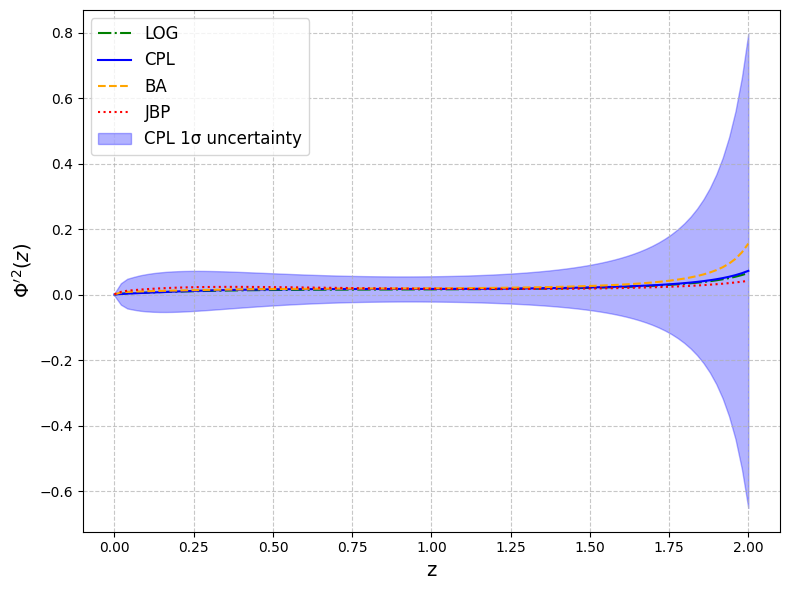

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import solve_ivp
from scipy.interpolate import CubicSpline

# --- Central difference derivative ---
def derivative(func, x, dx=1e-5):
    return (func(x + dx) - func(x - dx)) / (2 * dx)

# --- SETTINGS ---
n = 2
z_eval = np.linspace(0, 2, 100)

# --------------------------------------------------------------------------------
# Best-fit parameters (NEW) for each model
# --------------------------------------------------------------------------------
params = {
    "CPL": {
        "M": -19.3374,
        "om": 0.286253,
        "obh2": 0.0223,
        "w0": -1.01341,
        "wa": -0.342229,
        "ga": 0.322089,
        "σ8": 0.780831,
        "h": 0.705644
    },
    "LOG": {
        "M": -19.3388,
        "om": 0.286815,
        "obh2": 0.0223,
        "w0": -1.01715,
        "wa": -0.255526,
        "ga": 0.311666,
        "σ8": 0.781457,
        "h": 0.705222
    },
    "BA": {
        "M": -19.3378,
        "om": 0.286084,
        "obh2": 0.0223,
        "w0": -1.02846,
        "wa": -0.163445,
        "ga": 0.321522,
        "σ8": 0.780939,
        "h": 0.705802
    },
    "JBP": {
        "M": -19.3337,
        "om": 0.283648,
        "obh2": 0.022493,
        "w0": -1.03197,
        "wa": -0.357571,
        "ga": 0.347624,
        "σ8": 0.781186,
        "h": 0.707511
    }
}

# --------------------------------------------------------------------------------
# CPL full covariance (om, w0, wa, ga)  (CovMarginal)
# --------------------------------------------------------------------------------
cov_cpl = np.array([
    [0.000215636,  0.00226876,  -0.00661639, -0.00281314],
    [0.00226876,   0.0262516,   -0.0797778,  -0.0307732],
    [-0.00661639, -0.0797778,    0.253849,    0.0894571],
    [-0.00281314, -0.0307732,    0.0894571,   0.0435601]
])

# --- FUNCTIONS ---
def muG(z, ga):
    x = z/(1+z)
    return 1.00002 + ga * x**n - ga * x**(2*n)

def f_CPL(z, w0, wa): return np.exp(-(3 * wa * z)/(1+z)) * (1+z)**(3*(1 + w0 + wa))
def f_LOG(z, w0, wa): return (1+z)**(3 + 3*w0 + 1.5*wa*np.log(1+z))
def f_BA (z, w0, wa): return (1+z)**(3 + 3*w0) * (1 + z**2)**(1.5*wa)
def f_JBP(z, w0, wa): return np.exp((3*wa*z**2)/(2*(1+z)**2)) * (1+z)**(3 + 3*w0)

def q_CPL(z, om, w0, wa): return om*(1+z)**3 + (1-om)*f_CPL(z, w0, wa)
def q_LOG(z, om, w0, wa): return om*(1+z)**3 + (1-om)*f_LOG(z, w0, wa)
def q_BA (z, om, w0, wa): return om*(1+z)**3 + (1-om)*f_BA (z, w0, wa)
def q_JBP(z, om, w0, wa): return om*(1+z)**3 + (1-om)*f_JBP(z, w0, wa)

def q1_CPL(z, om, w0, wa): return derivative(lambda zz: q_CPL(zz, om, w0, wa), z)
def q1_LOG(z, om, w0, wa): return derivative(lambda zz: q_LOG(zz, om, w0, wa), z)
def q1_BA (z, om, w0, wa): return derivative(lambda zz: q_BA (zz, om, w0, wa), z)
def q1_JBP(z, om, w0, wa): return derivative(lambda zz: q_JBP(zz, om, w0, wa), z)

def F_ode(z, y, model, om, w0, wa, ga):
    F, Fp = y
    if model == "CPL":
        qv, q1v = q_CPL(z, om, w0, wa), q1_CPL(z, om, w0, wa)
    elif model == "LOG":
        qv, q1v = q_LOG(z, om, w0, wa), q1_LOG(z, om, w0, wa)
    elif model == "BA":
        qv, q1v = q_BA(z, om, w0, wa), q1_BA(z, om, w0, wa)
    else:
        qv, q1v = q_JBP(z, om, w0, wa), q1_JBP(z, om, w0, wa)

    mu = muG(z, ga)
    Fpp = -(2/(1+z) + q1v/(2*qv)) * Fp
    Fpp += (q1v/(qv*(1+z))) * F
    Fpp -= (3*(1+z)/qv) * om
    Fpp -= (Fp**2 * (4 - 3*mu*F)) / (2*F*(mu*F - 1))
    return [Fp, Fpp]

def solve_F(model, om, w0, wa, ga):
    y0 = [1.0, 0.0]
    sol = solve_ivp(lambda z, Y: F_ode(z, Y, model, om, w0, wa, ga),
                    [0.0, 2.0], y0, t_eval=z_eval, method='BDF',
                    rtol=1e-8, atol=1e-10)
    return sol.t, sol.y[0], sol.y[1]

def phi_squared(model, om, w0, wa, ga):
    z_g, F, Fp = solve_F(model, om, w0, wa, ga)
    # Smooth second derivative via spline on F'
    Fp_spline = CubicSpline(z_g, Fp)
    Fpp = Fp_spline(z_g, 1)

    if model == "CPL":
        qv = q_CPL(z_g, om, w0, wa); q1v = np.array([q1_CPL(z, om, w0, wa) for z in z_g])
    elif model == "LOG":
        qv = q_LOG(z_g, om, w0, wa); q1v = np.array([q1_LOG(z, om, w0, wa) for z in z_g])
    elif model == "BA":
        qv = q_BA (z_g, om, w0, wa); q1v = np.array([q1_BA (z, om, w0, wa) for z in z_g])
    else:
        qv = q_JBP(z_g, om, w0, wa); q1v = np.array([q1_JBP(z, om, w0, wa) for z in z_g])

    phi2 = -Fpp - (2/(1+z_g) + q1v/(2*qv))*Fp + (q1v/(qv*(1+z_g)))*F - (3*(1+z_g)*om)/qv
    return np.interp(z_eval, z_g, phi2)

# --- CPL φ'^2 uncertainty ---
def phi2_error(z_index, central_params, cov, delta=1e-4):
    om, w0, wa, ga = central_params
    grad = np.zeros(4)
    for i in range(4):
        p_plus  = [om, w0, wa, ga]
        p_minus = [om, w0, wa, ga]
        p_plus[i]  += delta
        p_minus[i] -= delta
        val_plus  = phi_squared("CPL", *p_plus)[z_index]
        val_minus = phi_squared("CPL", *p_minus)[z_index]
        grad[i] = (val_plus - val_minus) / (2*delta)
    var = grad @ cov @ grad
    return np.sqrt(var) if var > 0 else 0.0

# --- Plot ---
plt.figure(figsize=(8, 6))
colors = {"LOG": "green", "CPL": "blue", "BA": "orange", "JBP": "red"}
styles = {"LOG": "dashdot", "CPL": "solid", "BA": "dashed", "JBP": "dotted"}

# Central curves
phi2_cache = {}
for model in ["LOG", "CPL", "BA", "JBP"]:
    p = params[model]
    phi2 = phi_squared(model, p["om"], p["w0"], p["wa"], p["ga"])
    phi2_cache[model] = phi2
    plt.plot(z_eval, phi2, label=model, color=colors[model],
             linestyle=styles[model], linewidth=1.5)

# CPL band
central_cpl = [params["CPL"]["om"], params["CPL"]["w0"], params["CPL"]["wa"], params["CPL"]["ga"]]
phi2_cpl = phi2_cache["CPL"]  # already computed
phi2_cpl_err = np.array([phi2_error(i, central_cpl, cov_cpl) for i in range(len(z_eval))])

plt.fill_between(z_eval,
                 phi2_cpl - phi2_cpl_err,
                 phi2_cpl + phi2_cpl_err,
                 color=colors["CPL"], alpha=0.30, label="CPL 1σ uncertainty")

plt.xlabel("z", fontsize=14)
plt.ylabel(r"$\Phi'^2(z)$", fontsize=14)
plt.grid(True, linestyle="--", alpha=0.7)

plt.legend(fontsize=12)
plt.tight_layout()
plt.show()

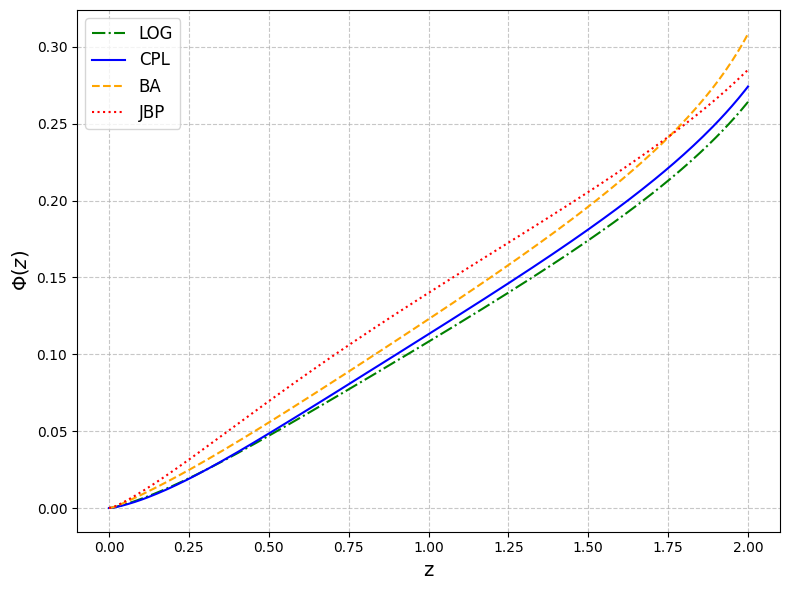

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import solve_ivp, cumulative_trapezoid
from scipy.interpolate import CubicSpline, interp1d

# --- Small derivative ---
def derivative(func, x, dx=1e-5, n=1):
    if n == 1:
        return (func(x + dx) - func(x - dx)) / (2 * dx)
    elif n == 2:
        return (func(x + dx) - 2*func(x) + func(x - dx)) / dx**2
    else:
        raise ValueError("Only 1st and 2nd derivatives supported.")

# --- Parameters ---
n = 2
z_eval = np.linspace(0, 2, 200)

# --------------------------------------------------------------------------------
# Best-fit parameters (NEW) for each model
# --------------------------------------------------------------------------------
params = {
    "CPL": {
        "M": -19.3374,
        "om": 0.286253,
        "obh2": 0.0223,
        "w0": -1.01341,
        "wa": -0.342229,
        "ga": 0.322089,
        "σ8": 0.780831,
        "h": 0.705644
    },
    "LOG": {
        "M": -19.3388,
        "om": 0.286815,
        "obh2": 0.0223,
        "w0": -1.01715,
        "wa": -0.255526,
        "ga": 0.311666,
        "σ8": 0.781457,
        "h": 0.705222
    },
    "BA": {
        "M": -19.3378,
        "om": 0.286084,
        "obh2": 0.0223,
        "w0": -1.02846,
        "wa": -0.163445,
        "ga": 0.321522,
        "σ8": 0.780939,
        "h": 0.705802
    },
    "JBP": {
        "M": -19.3337,
        "om": 0.283648,
        "obh2": 0.022493,
        "w0": -1.03197,
        "wa": -0.357571,
        "ga": 0.347624,
        "σ8": 0.781186,
        "h": 0.707511
    }
}
def muG(z, ga):
    return 1.00002 + ga * (z/(1+z))**n - ga * (z/(1+z))**(2*n)

def f_CPL(z, w0, wa): return np.exp(-(3*wa*z)/(1+z))*(1+z)**(3*(1+w0+wa))
def f_BA(z, w0, wa): return (1+z)**(3+3*w0)*(1+z**2)**(3*wa/2)
def f_JBP(z, w0, wa): return np.exp((3*wa*z**2)/(2*(1+z)**2))*(1+z)**(3+3*w0)
def f_LOG(z, w0, wa): return (1+z)**(3 + 3*w0 + 1.5*wa*np.log(1+z))

def q_CPL(z, om, w0, wa): return om*(1+z)**3 + (1-om)*f_CPL(z,w0,wa)
def q_BA(z, om, w0, wa): return om*(1+z)**3 + (1-om)*f_BA(z,w0,wa)
def q_JBP(z, om, w0, wa): return om*(1+z)**3 + (1-om)*f_JBP(z,w0,wa)
def q_LOG(z, om, w0, wa): return om*(1+z)**3 + (1-om)*f_LOG(z,w0,wa)

def q1_CPL(z, om, w0, wa): return derivative(lambda x: q_CPL(x, om, w0, wa), z)
def q1_BA(z, om, w0, wa): return derivative(lambda x: q_BA(x, om, w0, wa), z)
def q1_JBP(z, om, w0, wa): return derivative(lambda x: q_JBP(x, om, w0, wa), z)
def q1_LOG(z, om, w0, wa): return derivative(lambda x: q_LOG(x, om, w0, wa), z)

# --- ODE for F ---
def F_ode(z, y, model, om, w0, wa, ga):
    F, Fp = y
    if model=="CPL": qv,q1v = q_CPL(z,om,w0,wa), q1_CPL(z,om,w0,wa)
    elif model=="BA": qv,q1v = q_BA(z,om,w0,wa), q1_BA(z,om,w0,wa)
    elif model=="JBP": qv,q1v = q_JBP(z,om,w0,wa), q1_JBP(z,om,w0,wa)
    else: qv,q1v = q_LOG(z,om,w0,wa), q1_LOG(z,om,w0,wa)
    muG_val = muG(z, ga)
    Fpp = - (2/(1+z) + q1v/(2*qv))*Fp + (q1v/(qv*(1+z)))*F - (3*(1+z)/qv)*om
    Fpp -= (Fp**2*(4-3*muG_val*F))/(2*F*(muG_val*F-1))
    return [Fp, Fpp]

def solve_F(model, om, w0, wa, ga):
    y0=[1.0,0.0]
    sol = solve_ivp(lambda z,y: F_ode(z,y,model,om,w0,wa,ga),
                    [0,2], y0, method='BDF', t_eval=z_eval, rtol=1e-8, atol=1e-10)
    return sol

def phi_squared(model, om, w0, wa, ga):
    sol = solve_F(model, om, w0, wa, ga)
    z_grid = sol.t
    F,Fp = sol.y
    Fp_spline = CubicSpline(z_grid,Fp)
    Fpp = Fp_spline(z_grid,1)

    if model=="CPL": qv=np.array([q_CPL(z,om,w0,wa) for z in z_grid]); q1v=np.array([q1_CPL(z,om,w0,wa) for z in z_grid])
    elif model=="BA": qv=np.array([q_BA(z,om,w0,wa) for z in z_grid]); q1v=np.array([q1_BA(z,om,w0,wa) for z in z_grid])
    elif model=="JBP": qv=np.array([q_JBP(z,om,w0,wa) for z in z_grid]); q1v=np.array([q1_JBP(z,om,w0,wa) for z in z_grid])
    else: qv=np.array([q_LOG(z,om,w0,wa) for z in z_grid]); q1v=np.array([q1_LOG(z,om,w0,wa) for z in z_grid])

    phi2 = -Fpp - (2/(1+z_grid)+q1v/(2*qv))*Fp + (q1v/(qv*(1+z_grid)))*F - (3*(1+z_grid)*om)/qv
    return interp1d(z_grid, phi2, kind='cubic', fill_value='extrapolate')

# --- Compute phi(z) non-piecewise ---
plt.figure(figsize=(8,6))
colors = {"LOG":"green","CPL":"blue","BA":"orange","JBP":"red"}
styles = {"LOG":"dashdot","CPL":"solid","BA":"dashed","JBP":"dotted"}

for model in ["LOG","CPL","BA","JBP"]:
    p = params[model]
    phi2_func = phi_squared(model,p["om"],p["w0"],p["wa"],p["ga"])
    phi_prime = np.sqrt(np.maximum(phi2_func(z_eval),0))
    phi = cumulative_trapezoid(phi_prime, z_eval, initial=0.0)
    plt.plot(z_eval, phi, label=f"{model}", color=colors[model], linestyle=styles[model], linewidth=1.5)

plt.xlabel("z", fontsize=14)
plt.ylabel(r"$\Phi(z)$", fontsize=14)
plt.grid(True, linestyle="--", alpha=0.7)
plt.legend(fontsize=12)
plt.tight_layout()
plt.show()

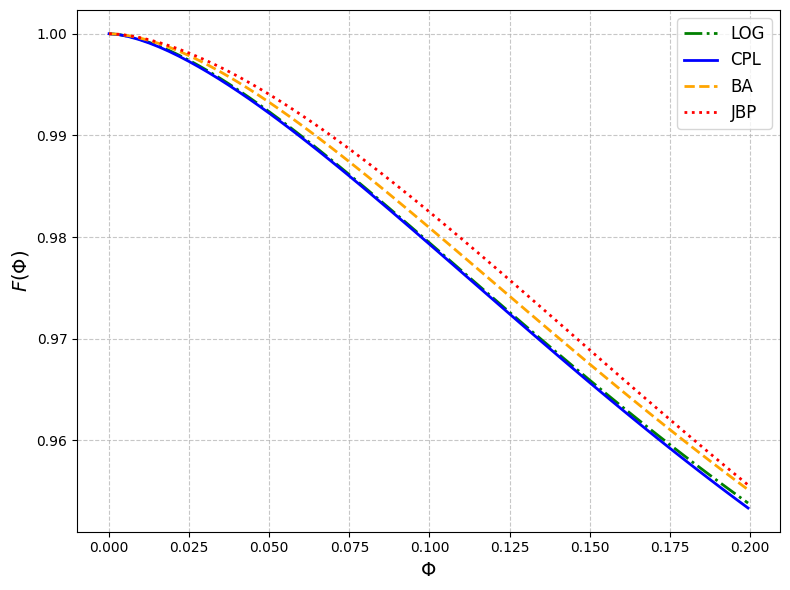

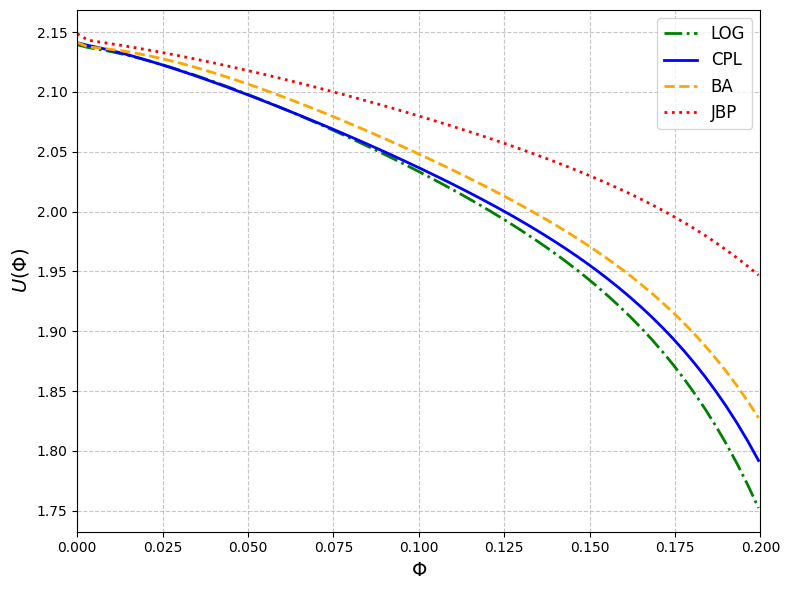

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import solve_ivp
from scipy.interpolate import interp1d, CubicSpline

# ✅ Custom central-difference derivative
def derivative(func, x, dx=1e-5, n=1):
    if n == 1:
        return (func(x + dx) - func(x - dx)) / (2 * dx)
    elif n == 2:
        return (func(x + dx) - 2 * func(x) + func(x - dx)) / (dx ** 2)
    else:
        raise ValueError("Only first and second derivatives are supported.")

# Constants
n = 2
z_CMB = 1089
z_range = (0, 2)
z_eval = np.linspace(0, 2, 100)

# --------------------------------------------------------------------------------
# Best-fit parameters (NEW) for each model
# --------------------------------------------------------------------------------
params = {
    "CPL": {
        "M": -19.3374,
        "om": 0.286253,
        "obh2": 0.0223,
        "w0": -1.01341,
        "wa": -0.342229,
        "ga": 0.322089,
        "σ8": 0.780831,
        "h": 0.705644
    },
    "LOG": {
        "M": -19.3388,
        "om": 0.286815,
        "obh2": 0.0223,
        "w0": -1.01715,
        "wa": -0.255526,
        "ga": 0.311666,
        "σ8": 0.781457,
        "h": 0.705222
    },
    "BA": {
        "M": -19.3378,
        "om": 0.286084,
        "obh2": 0.0223,
        "w0": -1.02846,
        "wa": -0.163445,
        "ga": 0.321522,
        "σ8": 0.780939,
        "h": 0.705802
    },
    "JBP": {
        "M": -19.3337,
        "om": 0.283648,
        "obh2": 0.022493,
        "w0": -1.03197,
        "wa": -0.357571,
        "ga": 0.347624,
        "σ8": 0.781186,
        "h": 0.707511
    }
}



# μG function
def muG(z, ga):
    return 1.00002 + ga * (z/(1+z))**n - ga * (z/(1+z))**(2*n)

# Dark energy functions
def f_CPL(z, w0, wa):
    return np.exp(-(3 * wa * z) / (1 + z)) * (1 + z)**(3 * (1 + w0 + wa))

def f_BA(z, w0, wa):
    return (1 + z)**(3 + 3 * w0) * (1 + z**2)**(3 * wa / 2)

def f_JBP(z, w0, wa):
    return np.exp((3 * wa * z**2) / (2 * (1 + z)**2)) * (1 + z)**(3 + 3 * w0)

def f_LOG(z, w0, wa):
    return (1 + z)**(3 + 3 * w0 + (3/2) * wa * np.log(1 + z))

# q(z) functions
def q_CPL(z, om, w0, wa):
    return om * (1 + z)**3 + (1 - om) * f_CPL(z, w0, wa)

def q_BA(z, om, w0, wa):
    return om * (1 + z)**3 + (1 - om) * f_BA(z, w0, wa)

def q_JBP(z, om, w0, wa):
    return om * (1 + z)**3 + (1 - om) * f_JBP(z, w0, wa)

def q_LOG(z, om, w0, wa):
    return om * (1 + z)**3 + (1 - om) * f_LOG(z, w0, wa)

# q'(z) functions using custom derivative
def q1_CPL(z, om, w0, wa):
    return derivative(lambda x: q_CPL(x, om, w0, wa), z)

def q1_BA(z, om, w0, wa):
    return derivative(lambda x: q_BA(x, om, w0, wa), z)

def q1_JBP(z, om, w0, wa):
    return derivative(lambda x: q_JBP(x, om, w0, wa), z)

def q1_LOG(z, om, w0, wa):
    return derivative(lambda x: q_LOG(x, om, w0, wa), z)

# Differential equation for F(z)
def F_ode(z, y, model, om, w0, wa, ga):
    F, Fp = y
    if model == "CPL":
        qv, q1v = q_CPL(z, om, w0, wa), q1_CPL(z, om, w0, wa)
    elif model == "BA":
        qv, q1v = q_BA(z, om, w0, wa), q1_BA(z, om, w0, wa)
    elif model == "JBP":
        qv, q1v = q_JBP(z, om, w0, wa), q1_JBP(z, om, w0, wa)
    else:
        qv, q1v = q_LOG(z, om, w0, wa), q1_LOG(z, om, w0, wa)

    muG_val = muG(z, ga)
    Fpp = - (2/(1+z) + q1v/(2*qv)) * Fp
    Fpp += (q1v/(qv*(1+z))) * F
    Fpp -= (3*(1+z)/qv) * om
    Fpp -= (Fp**2 * (4 - 3*muG_val*F)) / (2*F*(muG_val*F - 1))
    return [Fp, Fpp]

def solve_F(model, om, w0, wa, ga):
    y0 = [1.0, 0.0]
    sol = solve_ivp(lambda z, y: F_ode(z, y, model, om, w0, wa, ga),
                    [0.0, 2.0], y0, method='BDF', t_eval=z_eval,
                    rtol=1e-8, atol=1e-10)
    return sol

    # --- U(z) reconstruction (smooth F' and F'') ---
def compute_U(model, om, w0, wa, ga):
    sol = solve_F(model, om, w0, wa, ga)
    z_grid = sol.t
    F = np.clip(sol.y[0], 1e-6, None)  # avoid F ~ 0 singularities
    Fp = sol.y[1]

    # ✅ Use CubicSpline for smooth F'' instead of np.gradient
    Fp_spline = CubicSpline(z_grid, Fp)
    Fpp = Fp_spline(z_grid, 1)  # first derivative of F' = F''

    # Compute q(z), q'(z)
    if model == "CPL":
        qv = q_CPL(z_grid, om, w0, wa)
        q1v = np.array([q1_CPL(z, om, w0, wa) for z in z_grid])
    elif model == "BA":
        qv = q_BA(z_grid, om, w0, wa)
        q1v = np.array([q1_BA(z, om, w0, wa) for z in z_grid])
    elif model == "JBP":
        qv = q_JBP(z_grid, om, w0, wa)
        q1v = np.array([q1_JBP(z, om, w0, wa) for z in z_grid])
    else:
        qv = q_LOG(z_grid, om, w0, wa)
        q1v = np.array([q1_LOG(z, om, w0, wa) for z in z_grid])

    # ✅ Compute U(z) with smooth Fpp
    U = (qv/2) * (1+z_grid)**2 * Fpp \
        + (((1+z_grid)**2 * q1v)/4 - 2*qv*(1+z_grid)) * Fp \
        + (3*qv - (1+z_grid)*q1v/2) * F \
        - (3/2)*(1+z_grid)**3 * om

    return np.interp(z_eval, z_grid, U)



# --- φ'^2 using spline for F'' ---
def phi_squared(model, om, w0, wa, ga):
    sol = solve_F(model, om, w0, wa, ga)
    z_grid = sol.t
    F = sol.y[0]
    Fp = sol.y[1]

    Fp_spline = CubicSpline(z_grid, Fp)
    Fpp = Fp_spline(z_grid, 1)

    if model == "CPL":
        qv = q_CPL(z_grid, om, w0, wa)
        q1v = np.array([q1_CPL(z, om, w0, wa) for z in z_grid])
    elif model == "BA":
        qv = q_BA(z_grid, om, w0, wa)
        q1v = np.array([q1_BA(z, om, w0, wa) for z in z_grid])
    elif model == "JBP":
        qv = q_JBP(z_grid, om, w0, wa)
        q1v = np.array([q1_JBP(z, om, w0, wa) for z in z_grid])
    else:
        qv = q_LOG(z_grid, om, w0, wa)
        q1v = np.array([q1_LOG(z, om, w0, wa) for z in z_grid])

    phi2 = -Fpp - (2/(1+z_grid) + q1v/(2*qv))*Fp \
           + (q1v/(qv*(1+z_grid)))*F - (3*(1+z_grid)*om)/qv

    return np.interp(z_eval, z_grid, phi2)



# Solve ODE and compute solutions
solutions_F = {}
for model in ["LOG", "CPL", "BA", "JBP"]:
    p = params[model]
    sol = solve_F(model, p["om"], p["w0"], p["wa"], p["ga"])
    solutions_F[model] = interp1d(sol.t, sol.y[0], kind='cubic', bounds_error=False, fill_value='extrapolate')

# Compute Φ(z)
phi_solutions = {}
for model in ["LOG", "CPL", "BA", "JBP"]:
    p = params[model]
    phi2 = phi_squared(model, p["om"], p["w0"], p["wa"], p["ga"])
    phi_prime = np.sqrt(np.clip(phi2, 0, None))
    phi = cumulative_trapezoid(phi_prime, z_eval, initial=0.0)
    phi_solutions[model] = interp1d(z_eval, phi, kind='cubic', bounds_error=False, fill_value='extrapolate')

# Compute z(Φ) by inverting Φ(z)
phi_range = np.linspace(min([phi_solutions[m](z_eval).min() for m in phi_solutions]),
                       max([phi_solutions[m](z_eval).max() for m in phi_solutions]), 100)
z_of_phi = {}
for model in ["LOG", "CPL", "BA", "JBP"]:
    z_of_phi[model] = interp1d(phi_solutions[model](z_eval), z_eval, kind='cubic', bounds_error=False, fill_value='extrapolate')

# Compute F(Φ) and U(Φ)
F_of_phi = {}
U_of_phi = {}
for model in ["LOG", "CPL", "BA", "JBP"]:
    p = params[model]
    z_vals = z_of_phi[model](phi_range)
    F_of_phi[model] = solutions_F[model](z_vals)
    U_vals = compute_U(model, p["om"], p["w0"], p["wa"], p["ga"])
    U_of_phi[model] = np.interp(z_vals, z_eval, U_vals)

# --- Plot F(Φ) ---
plt.figure(figsize=(8, 6))
colors = {"LOG": "green", "CPL": "blue", "BA": "orange", "JBP": "red"}
styles = {"LOG": "dashdot", "CPL": "solid", "BA": "dashed", "JBP": "dotted"}

mask = phi_range <= 0.2
for model in ["LOG", "CPL", "BA", "JBP"]:
    plt.plot(phi_range[mask], F_of_phi[model][mask],
             label=model, color=colors[model], linestyle=styles[model], linewidth=2)

plt.xlabel(r"$\Phi$", fontsize=14)
plt.ylabel(r"$F(\Phi)$", fontsize=14)
plt.grid(True, linestyle="--", alpha=0.7)
plt.legend(fontsize=12)
plt.tight_layout()
plt.show()

# --- Plot U(Φ) ---
plt.figure(figsize=(8, 6))
mask = (phi_range >= 0.0) & (phi_range <= 0.2)
for model in ["LOG", "CPL", "BA", "JBP"]:
    plt.plot(phi_range[mask], U_of_phi[model][mask],
             label=model, color=colors[model], linestyle=styles[model], linewidth=2)

plt.xlabel(r"$\Phi$", fontsize=14)
plt.ylabel(r"$U(\Phi)$", fontsize=14)
plt.grid(True, linestyle="--", alpha=0.7)
plt.xlim([0, 0.2])
plt.legend(fontsize=12)
plt.tight_layout()
plt.show()

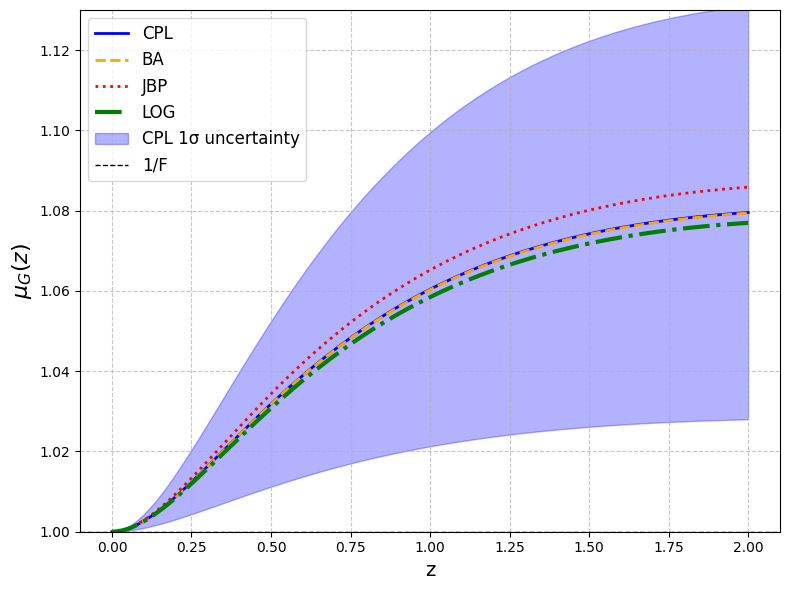

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# --- CONSTANTS ---
n = 2
z_eval = np.linspace(0, 2, 200)

# --------------------------------------------------------------------------------
# Best-fit parameters (NEW) for each model
# --------------------------------------------------------------------------------
params = {
    "CPL": {
        "M": -19.3374,
        "om": 0.286253,
        "obh2": 0.0223,
        "w0": -1.01341,
        "wa": -0.342229,
        "ga": 0.322089,
        "σ8": 0.780831,
        "h": 0.705644
    },
    "LOG": {
        "M": -19.3388,
        "om": 0.286815,
        "obh2": 0.0223,
        "w0": -1.01715,
        "wa": -0.255526,
        "ga": 0.311666,
        "σ8": 0.781457,
        "h": 0.705222
    },
    "BA": {
        "M": -19.3378,
        "om": 0.286084,
        "obh2": 0.0223,
        "w0": -1.02846,
        "wa": -0.163445,
        "ga": 0.321522,
        "σ8": 0.780939,
        "h": 0.705802
    },
    "JBP": {
        "M": -19.3337,
        "om": 0.283648,
        "obh2": 0.022493,
        "w0": -1.03197,
        "wa": -0.357571,
        "ga": 0.347624,
        "σ8": 0.781186,
        "h": 0.707511
    }
}

# --------------------------------------------------------------------------------
# CPL full covariance (om, w0, wa, ga)  (CovMarginal)
# --------------------------------------------------------------------------------
cov_cpl = np.array([
    [0.000215636,  0.00226876,  -0.00661639, -0.00281314],
    [0.00226876,   0.0262516,   -0.0797778,  -0.0307732],
    [-0.00661639, -0.0797778,    0.253849,    0.0894571],
    [-0.00281314, -0.0307732,    0.0894571,   0.0435601]
])


# --- μ_G(z) ---
def muG(z, ga):
    x = z/(1+z)
    return 1.00002 + ga * x**n - ga * x**(2*n)

# dμ/dγ_a
def dmu_dga(z):
    x = z/(1+z)
    return x**n - x**(2*n)

# Error (only gamma variance term)
def muG_error(z, ga, var_ga):
    grad = dmu_dga(z)
    return np.sqrt(grad**2 * var_ga)

# --- PLOT ---
plt.figure(figsize=(8, 6))
colors = {"LOG": "green", "CPL": "blue", "BA": "orange", "JBP": "red"}
styles = {"LOG": "dashdot", "CPL": "solid", "BA": "dashed", "JBP": "dotted"}

# Plot CPL, BA, JBP first
for model in ["CPL", "BA", "JBP"]:
    ga = params[model]["ga"]
    mu_vals = muG(z_eval, ga)
    plt.plot(z_eval, mu_vals,
             color=colors[model],
             linestyle=styles[model],
             linewidth=2,
             label=model)

# LOG last (thicker)
ga_log = params["LOG"]["ga"]
mu_log = muG(z_eval, ga_log)
plt.plot(z_eval, mu_log,
         color=colors["LOG"],
         linestyle=styles["LOG"],
         linewidth=3,
         label="LOG")

# CPL uncertainty band
ga_cpl = params["CPL"]["ga"]
mu_cpl = muG(z_eval, ga_cpl)
ga_var = cov_cpl[3, 3]
mu_err = muG_error(z_eval, ga_cpl, ga_var)

plt.fill_between(z_eval,
                 mu_cpl - mu_err,
                 mu_cpl + mu_err,
                 color=colors["CPL"],
                 alpha=0.30,
                 label="CPL 1σ uncertainty")

# Reference line
plt.axhline(y=1, color='black', linestyle='--', linewidth=1, label='1/F')

plt.xlabel("z", fontsize=14)
plt.ylabel(r"$\mu_G(z)$", fontsize=16)
plt.grid(True, linestyle="--", alpha=0.7)
plt.legend(fontsize=12)
plt.ylim(1, 1.13)
plt.tight_layout()
plt.show()

/tmp/ipython-input-2493977244.py:148: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()


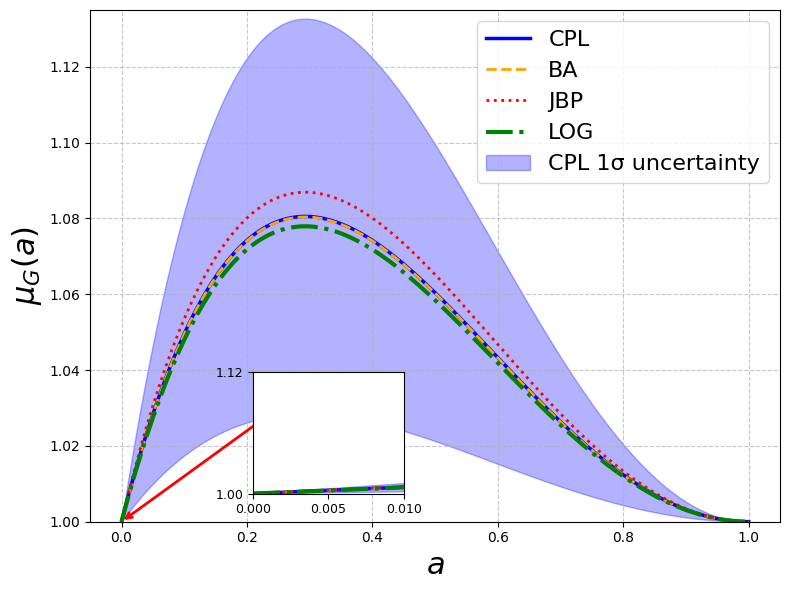

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.patches import Rectangle

# --- CONSTANTS ---
n = 2
a_eval = np.linspace(0, 1, 200)

# --------------------------------------------------------------------------------
# Best-fit parameters (NEW) for each model
# --------------------------------------------------------------------------------
params = {
    "CPL": {
        "M": -19.3374,
        "om": 0.286253,
        "obh2": 0.0223,
        "w0": -1.01341,
        "wa": -0.342229,
        "ga": 0.322089,
        "σ8": 0.780831,
        "h": 0.705644
    },
    "LOG": {
        "M": -19.3388,
        "om": 0.286815,
        "obh2": 0.0223,
        "w0": -1.01715,
        "wa": -0.255526,
        "ga": 0.311666,
        "σ8": 0.781457,
        "h": 0.705222
    },
    "BA": {
        "M": -19.3378,
        "om": 0.286084,
        "obh2": 0.0223,
        "w0": -1.02846,
        "wa": -0.163445,
        "ga": 0.321522,
        "σ8": 0.780939,
        "h": 0.705802
    },
    "JBP": {
        "M": -19.3337,
        "om": 0.283648,
        "obh2": 0.022493,
        "w0": -1.03197,
        "wa": -0.357571,
        "ga": 0.347624,
        "σ8": 0.781186,
        "h": 0.707511
    }
}

CovMarginalga = 0.0435601

def muG_a(a, n, ga):
    x = 1 - a
    return 1.00002 + ga * x**n - ga * x**(2*n)

def dmu_dga_a(a, n):
    x = 1 - a
    return x**n - x**(2*n)

def muG_error_a(a, n, var_ga):
    grad = dmu_dga_a(a, n)
    return np.sqrt(grad**2 * var_ga)

# --- Main plot ---
fig, ax = plt.subplots(figsize=(8, 6))
colors = {"LOG": "green", "CPL": "blue", "BA": "orange", "JBP": "red"}
styles = {"LOG": "dashdot", "CPL": "solid", "BA": "dashed", "JBP": "dotted"}

for model in ["CPL", "BA", "JBP"]:
    ga = params[model]["ga"]
    mu_vals = muG_a(a_eval, n, ga)
    ax.plot(a_eval, mu_vals,
            color=colors[model],
            linestyle=styles[model],
            linewidth=2 if model != "CPL" else 2.5,
            label=model)

ga_log = params["LOG"]["ga"]
mu_log = muG_a(a_eval, n, ga_log)
ax.plot(a_eval, mu_log,
        color=colors["LOG"],
        linestyle=styles["LOG"],
        linewidth=3,
        label="LOG")

ga_cpl = params["CPL"]["ga"]
mu_cpl = muG_a(a_eval, n, ga_cpl)
mu_err = muG_error_a(a_eval, n, CovMarginalga)
ax.fill_between(a_eval,
                mu_cpl - mu_err,
                mu_cpl + mu_err,
                color=colors["CPL"],
                alpha=0.30,
                label="CPL 1σ uncertainty")

# Remove 1/F from legend and plot (not plotted here)

ax.set_xlabel(r"$a$", fontsize=22)
ax.set_ylabel(r"$\mu_G(a)$", fontsize=22)
ax.grid(True, linestyle="--", alpha=0.7)
ax.legend(fontsize=16)
ax.set_ylim(1, 1.135) # <--- Y limit of the main plot

# --- Inset/zoomed plot for a~0 (CMB region) ---
from mpl_toolkits.axes_grid1.inset_locator import inset_axes

# ---- CHANGE THIS PART OF THE CODE TO ADJUST FRAME SIZE AND PLACEMENT ----
# To change y-range of the frame, change axins.set_ylim(1, 1.01) below.
# To change the size of the frame, adjust width and height.
# To change the placement, adjust bbox_to_anchor parameters.

axins = inset_axes(ax, width="60%", height="8%", loc="lower center",
                   bbox_to_anchor=(.13, 1.0001, 0.40, 0.40), bbox_transform=ax.transData, borderpad=2)
# ------------------------------------------------------------------------

a_zoom = np.linspace(0, 0.01, 200)
for model in ["CPL", "BA", "JBP"]:
    ga = params[model]["ga"]
    mu_vals_zoom = muG_a(a_zoom, n, ga)
    axins.plot(a_zoom, mu_vals_zoom,
               color=colors[model],
               linestyle=styles[model],
               linewidth=2 if model != "CPL" else 2.5)
ga_log = params["LOG"]["ga"]
mu_log_zoom = muG_a(a_zoom, n, ga_log)
axins.plot(a_zoom, mu_log_zoom,
           color=colors["LOG"], linestyle=styles["LOG"], linewidth=3)
ga_cpl = params["CPL"]["ga"]
mu_cpl_zoom = muG_a(a_zoom, n, ga_cpl)
mu_err_zoom = muG_error_a(a_zoom, n, CovMarginalga)
axins.fill_between(a_zoom, mu_cpl_zoom - mu_err_zoom, mu_cpl_zoom + mu_err_zoom,
                   color=colors["CPL"], alpha=0.30)
axins.set_xlim(0, 0.01)
axins.set_ylim(1, 1.12) # <--- Y range of the frame (zoomed plot)
axins.set_xticks([0, 0.005, 0.01])
axins.set_yticks([1.0, 1.12])
axins.tick_params(axis='both', labelsize=9)

# Draw an arrow from inset to main plot, pointing to (a=0, μ_G(a)=1)
ax.annotate('', xy=(0, 1), xytext=(0.25, 1.03),
            textcoords='data', arrowprops=dict(facecolor='red', edgecolor='red', arrowstyle='->', lw=2))

plt.tight_layout()
plt.show()

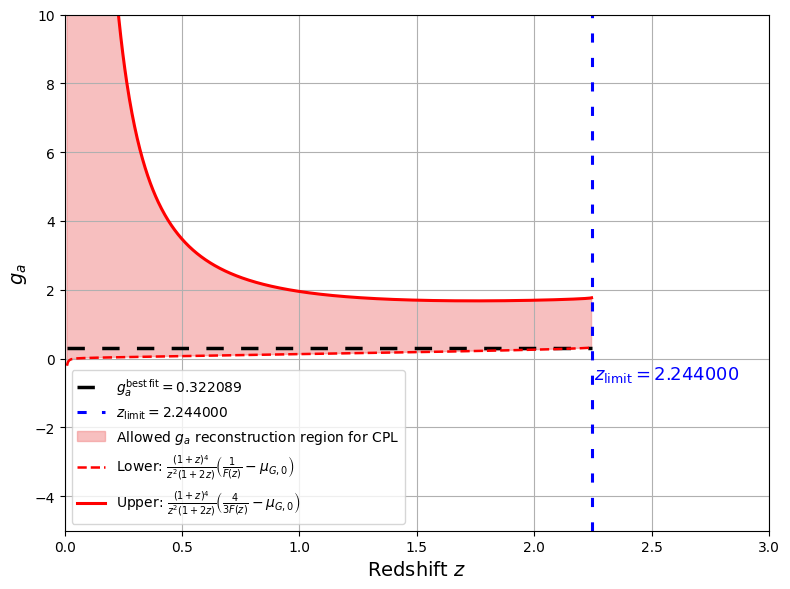

Reconstruction region ends at z_limit = 2.244000000000


In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import solve_ivp
from scipy.interpolate import interp1d

# --- CPL parameters ---
params = {
    "M": -19.3374,
    "om": 0.286253,
    "obh2": 0.0223,
    "w0": -1.01341,
    "wa": -0.342229,
    "ga": 0.322089,  # best-fit value for CPL
    "σ8": 0.780831,
    "h": 0.705644
}
n = 2

def muG(z, ga):
    x = z / (1 + z)
    return 1.00002 + ga * x**n - ga * x**(2 * n)

def f_CPL(z, w0, wa):
    return np.exp(-(3 * wa * z) / (1 + z)) * (1 + z)**(3 * (1 + w0 + wa))

def q_CPL(z, om, w0, wa):
    return om * (1 + z)**3 + (1 - om) * f_CPL(z, w0, wa)

def derivative(func, x, dx=1e-5):
    return (func(x + dx) - func(x - dx)) / (2.0 * dx)

def q1_CPL(z, om, w0, wa):
    return derivative(lambda zz: q_CPL(zz, om, w0, wa), z)

def F_ode(z, y, om, w0, wa, ga):
    F, Fp = y
    qv = q_CPL(z, om, w0, wa)
    q1v = q1_CPL(z, om, w0, wa)
    mu = muG(z, ga)
    Fpp = -(2/(1+z) + q1v/(2*qv)) * Fp \
          + (q1v/(qv*(1+z))) * F \
          - (3*(1+z)/qv) * om \
          - (Fp**2 * (4 - 3*mu*F)) / (2*F*(mu*F - 1))
    return [Fp, Fpp]

def solve_F(om, w0, wa, ga, z_grid):
    y0 = [1.0, 0.0]
    sol = solve_ivp(
        lambda z, y: F_ode(z, y, om, w0, wa, ga),
        [z_grid[0], z_grid[-1]],
        y0,
        t_eval=z_grid,
        method='BDF',
        rtol=1e-8,
        atol=1e-10
    )
    # Interpolate if ODE solver did not hit all grid points
    if len(sol.t) != len(z_grid):
        F_interp = interp1d(sol.t, sol.y[0], kind="cubic", bounds_error=False, fill_value="extrapolate")
        Fz = F_interp(z_grid)
    else:
        Fz = sol.y[0]
    return Fz

# --- Redshift range (avoid z=0) ---
z = np.linspace(0.01, 2.244, 800)

# --- Compute F(z) for CPL ---
Fz = solve_F(params["om"], params["w0"], params["wa"], params["ga"], z)

mu_G0 = 1.00002

# --- Calculate bounds using F(z) ---
lower = ((1 + z)**4 / (z**2 * (1 + 2*z))) * (1 / Fz - mu_G0)
upper = ((1 + z)**4 / (z**2 * (1 + 2*z))) * (4 / (3 * Fz) - mu_G0)

# --- Find crossing point of ga_bestfit and lower bound ---
ga_bestfit = params["ga"]
diff = lower - ga_bestfit
cross_indices = np.where((diff[1:] > 0) & (diff[:-1] <= 0))[0]
if len(cross_indices) > 0:
    z_cross_idx = cross_indices[0] + 1
    z_cross = z[z_cross_idx]
else:
    z_cross = None  # No crossing found

# --- Plot ---
plt.figure(figsize=(8,6))

# Bold dashed black best-fit line for ga
plt.plot(z, [ga_bestfit]*len(z),
         color='black', linestyle=(0, (5, 5)), linewidth=2.5,
         label=rf"$g_a^\mathrm{{best\,fit}} = {ga_bestfit:.6f}$")

# Vertical dashed line at crossing (blue, named z_limit)
if z_cross is not None:
    plt.axvline(x=z_cross, color='blue', linestyle=(0, (3, 5)), linewidth=2.2,
                label=rf"$z_{{\rm limit}}={z_cross:.6f}$")
    # Place label above line (optional, can comment out if you want only legend)
    plt.text(z_cross+0.01, plt.ylim()[1]-0.5, f"$z_{{\\rm limit}}={z_cross:.6f}$", color='blue', fontsize=13, va='top', ha='left')

# Allowed region
plt.fill_between(z, lower, upper, color='lightcoral', alpha=0.5, label=r'Allowed $g_a$ reconstruction region for CPL')
plt.plot(z, lower, 'r--', linewidth=1.8,
         label=r"Lower: $\frac{(1+z)^4}{z^2(1+2z)}\left(\frac{1}{F(z)}-\mu_{G,0}\right)$")
plt.plot(z, upper, 'r-', linewidth=2.2,
         label=r"Upper: $\frac{(1+z)^4}{z^2(1+2z)}\left(\frac{4}{3F(z)}-\mu_{G,0}\right)$")

plt.xlabel(r'Redshift $z$', fontsize=14)
plt.ylabel(r'$g_a$', fontsize=14)
plt.legend(fontsize=10)  # Slightly smaller legend
plt.grid(True)
plt.xlim(0, 3)
plt.ylim(-5, 10)
plt.tight_layout()
plt.show()

if z_cross is not None:
    print(f"Reconstruction region ends at z_limit = {z_cross:.12f}")
else:
    print("No crossing point found: best-fit ga does not cross lower bound in region.")

<>:41: SyntaxWarning: invalid escape sequence '\P'
<>:41: SyntaxWarning: invalid escape sequence '\P'
/tmp/ipython-input-3120297416.py:41: SyntaxWarning: invalid escape sequence '\P'
  label="Data reconstructed $F(\Phi)$")


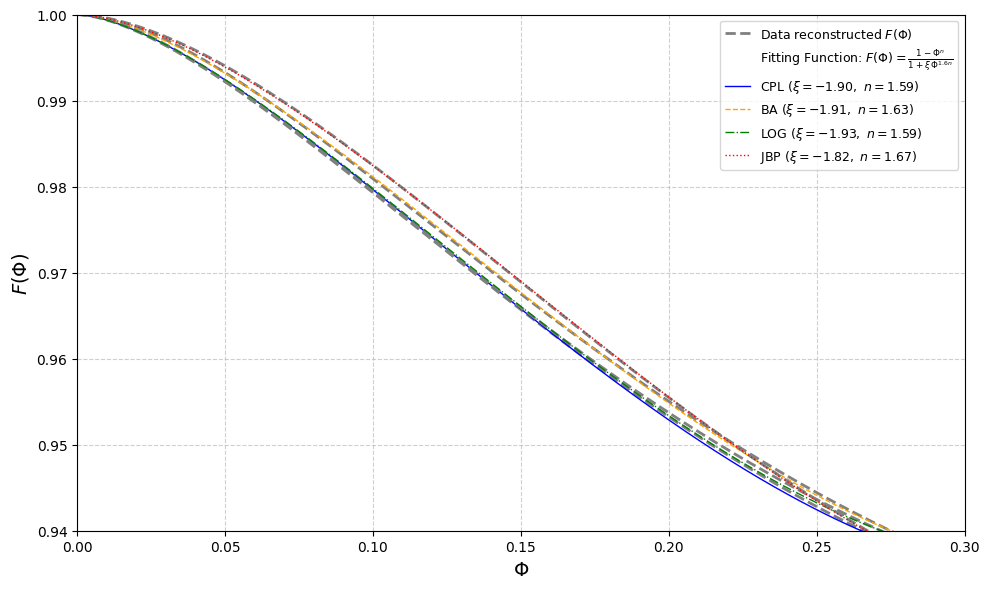


Fit Results for all models:
CPL: ξ = -1.90432 ± 0.00132, n = 1.59024 ± 0.00067, χ²_red = 1.028e-07
BA: ξ = -1.91103 ± 0.00108, n = 1.62887 ± 0.00052, χ²_red = 5.470e-08
LOG: ξ = -1.92953 ± 0.00130, n = 1.59203 ± 0.00068, χ²_red = 1.025e-07
JBP: ξ = -1.81800 ± 0.00050, n = 1.67001 ± 0.00021, χ²_red = 7.974e-09


In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit
from scipy.interpolate import interp1d

phi_vals = np.linspace(0, .3, 300)

model_names = ["CPL", "BA", "LOG", "JBP"]
colors = {"CPL": "blue", "BA": "orange", "LOG": "green", "JBP": "red"}
styles = {"CPL": "solid", "BA": "dashed", "LOG": "dashdot", "JBP": "dotted"}

def F_custom(phi, xi, n):
    return (1 - np.power(phi, n)) / (1 + xi * np.power(phi, 1.6 * n))

fit_results = []

plt.figure(figsize=(10, 6))

for i, model in enumerate(model_names):
    F_interp = interp1d(phi_range, F_of_phi[model], kind='cubic', fill_value='extrapolate')
    F_vals = F_interp(phi_vals)
    mask = (phi_vals > 1e-6)
    phi_vals_fit = phi_vals[mask]
    F_vals_fit = F_vals[mask]
    popt, pcov = curve_fit(F_custom, phi_vals_fit, F_vals_fit, p0=[0.1, 1.0], maxfev=20000)
    perr = np.sqrt(np.diag(pcov))
    residuals = F_vals_fit - F_custom(phi_vals_fit, *popt)
    chi2 = np.sum(residuals**2)
    dof = len(phi_vals_fit) - len(popt)
    chi2_red = chi2 / dof
    fit_results.append({
        "model": model,
        "xi": popt[0], "xi_err": perr[0],
        "n": popt[1], "n_err": perr[1],
        "chi2_red": chi2_red
    })

    # Plot original model (dashed gray), with legend only for the first model
    if i == 0:
        plt.plot(phi_vals, F_vals, linestyle='--', color='gray', lw=2,
                 label="Data reconstructed $F(\Phi)$")
        # Add dummy plot for fitting function right after reconstructed data
        plt.plot([], [], ' ', label=r"Fitting Function: $F(\Phi) = \frac{1-\Phi^n}{1+\xi\,\Phi^{1.6n}}$")
    else:
        plt.plot(phi_vals, F_vals, linestyle='--', color='gray', lw=2)

    # Plot fit with model-specific color and style
    latex_label = fr"{model} ($\xi={popt[0]:.2f},\ n={popt[1]:.2f}$)"
    plt.plot(phi_vals, F_custom(phi_vals, *popt), color=colors[model], linestyle=styles[model], lw=1, label=latex_label)

plt.xlabel(r"$\Phi$", fontsize=14)
plt.ylabel(r"$F(\Phi)$", fontsize=14)
plt.xlim([0, .3])
plt.ylim([0.94, 1.00])
plt.grid(True, linestyle="--", alpha=0.6)
plt.legend(fontsize=9)
plt.tight_layout()
plt.show()

# Print results for all models (unchanged)
print("\nFit Results for all models:")
for r in fit_results:
    print(f"{r['model']}: ξ = {r['xi']:.5f} ± {r['xi_err']:.5f}, n = {r['n']:.5f} ± {r['n_err']:.5f}, χ²_red = {r['chi2_red']:.3e}")

<>:41: SyntaxWarning: invalid escape sequence '\P'
<>:41: SyntaxWarning: invalid escape sequence '\P'
/tmp/ipython-input-1090112631.py:41: SyntaxWarning: invalid escape sequence '\P'
  label="Data reconstructed $F(\Phi)$")


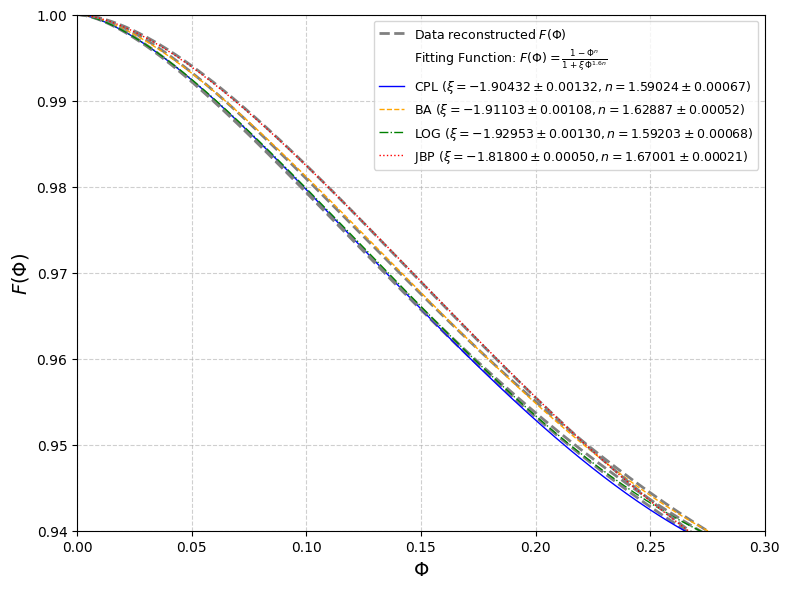


Fit Results for all models:
CPL: ξ = -1.90432 ± 0.00132, n = 1.59024 ± 0.00067, χ²_red = 1.028e-07
BA: ξ = -1.91103 ± 0.00108, n = 1.62887 ± 0.00052, χ²_red = 5.470e-08
LOG: ξ = -1.92953 ± 0.00130, n = 1.59203 ± 0.00068, χ²_red = 1.025e-07
JBP: ξ = -1.81800 ± 0.00050, n = 1.67001 ± 0.00021, χ²_red = 7.974e-09


In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit
from scipy.interpolate import interp1d

phi_vals = np.linspace(0, .3, 300)

model_names = ["CPL", "BA", "LOG", "JBP"]
colors = {"CPL": "blue", "BA": "orange", "LOG": "green", "JBP": "red"}
styles = {"CPL": "solid", "BA": "dashed", "LOG": "dashdot", "JBP": "dotted"}

def F_custom(phi, xi, n):
    return (1 - np.power(phi, n)) / (1 + xi * np.power(phi, 1.6 * n))

fit_results = []

plt.figure(figsize=(8, 6))

for i, model in enumerate(model_names):
    F_interp = interp1d(phi_range, F_of_phi[model], kind='cubic', fill_value='extrapolate')
    F_vals = F_interp(phi_vals)
    mask = (phi_vals > 1e-6)
    phi_vals_fit = phi_vals[mask]
    F_vals_fit = F_vals[mask]
    popt, pcov = curve_fit(F_custom, phi_vals_fit, F_vals_fit, p0=[0.1, 1.0], maxfev=20000)
    perr = np.sqrt(np.diag(pcov))
    residuals = F_vals_fit - F_custom(phi_vals_fit, *popt)
    chi2 = np.sum(residuals**2)
    dof = len(phi_vals_fit) - len(popt)
    chi2_red = chi2 / dof
    fit_results.append({
        "model": model,
        "xi": popt[0], "xi_err": perr[0],
        "n": popt[1], "n_err": perr[1],
        "chi2_red": chi2_red
    })

    # Plot original model (dashed gray), with legend only for the first model
    if i == 0:
        plt.plot(phi_vals, F_vals, linestyle='--', color='gray', lw=2,
                 label="Data reconstructed $F(\Phi)$")
        # Add dummy plot for fitting function right after reconstructed data
        plt.plot([], [], ' ', label=r"Fitting Function: $F(\Phi) = \frac{1-\Phi^n}{1+\xi\,\Phi^{1.6n}}$")
    else:
        plt.plot(phi_vals, F_vals, linestyle='--', color='gray', lw=2)

    # Plot fit with model-specific color and style
    latex_label = fr"{model} ($\xi={popt[0]:.5f}\pm{perr[0]:.5f}, n={popt[1]:.5f}\pm{perr[1]:.5f}$)"
    plt.plot(phi_vals, F_custom(phi_vals, *popt), color=colors[model], linestyle=styles[model], lw=1, label=latex_label)

plt.xlabel(r"$\Phi$", fontsize=14)
plt.ylabel(r"$F(\Phi)$", fontsize=14)
plt.xlim([0, .3])
plt.ylim([0.94, 1.00])
plt.grid(True, linestyle="--", alpha=0.6)
plt.legend(fontsize=9)
plt.tight_layout()
plt.show()

# Print results for all models (unchanged)
print("\nFit Results for all models:")
for r in fit_results:
    print(f"{r['model']}: ξ = {r['xi']:.5f} ± {r['xi_err']:.5f}, n = {r['n']:.5f} ± {r['n_err']:.5f}, χ²_red = {r['chi2_red']:.3e}")


Fit for pink trial U(Φ) = V0 e^{a Φ^b + c Φ}
V0 = 2.141161 (fixed)
a = -8.897755e+01 ± 1.05e+01
b = 4.314418e+00 ± 7.49e-02
c = -4.425382e-01 ± 3.44e-03
χ²_red = 9.955e-06


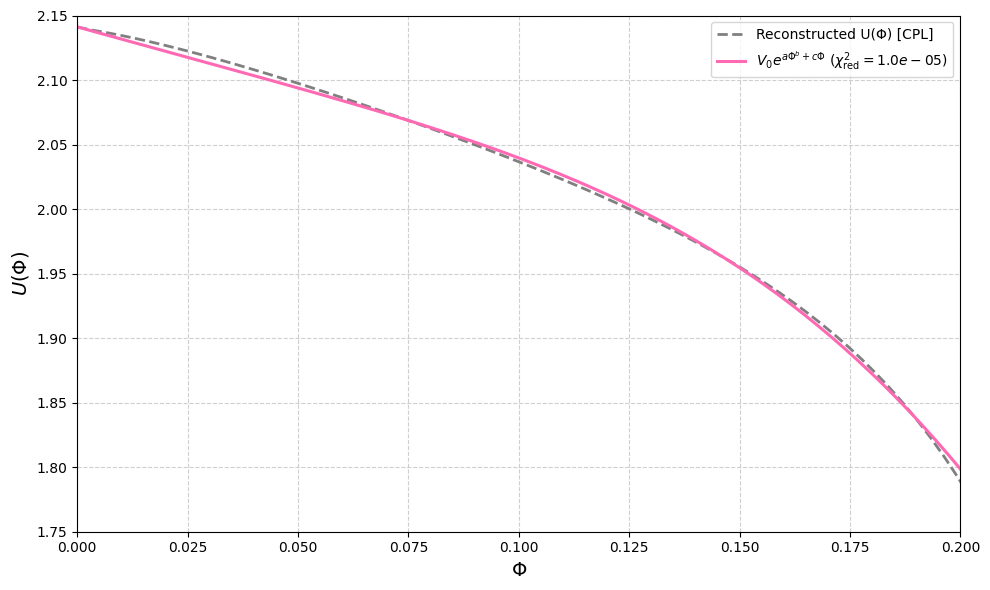

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit
from scipy.interpolate import interp1d

# --- Data ---
phi_vals = np.linspace(0, .3, 300) # Use a denser range for fitting
U_interp = interp1d(phi_range, U_of_phi["CPL"], kind='cubic', fill_value='extrapolate')
U_vals = U_interp(phi_vals)

# --- Fit region ---
mask = (phi_vals > 1e-6) & (phi_vals <= 0.2)
z = phi_vals[mask]
y = U_vals[mask]

# --- Fix reference V0 ---
# V0 = 2.2 # Commented out as it's now automatically determined
V0 = U_vals[np.argmin(np.abs(phi_vals - 1e-6))]

# --- Pink trial: exp(a φ^b + c φ) -------------------
def U_pink(phi, a, b, c):
    return V0 * np.exp(a * phi**b + c * phi)

# --- Fit ---
p0 = [-1.0, 1.5, -0.2]
popt, pcov = curve_fit(U_pink, z, y, p0=p0, maxfev=60000)
perr = np.sqrt(np.diag(pcov))

resid = y - U_pink(z, *popt)
chi2 = np.sum(resid**2)
dof = len(y) - len(popt)
chi2_red = chi2 / dof

print("\nFit for pink trial U(Φ) = V0 e^{a Φ^b + c Φ}")
print(f"V0 = {V0:.6f} (fixed)")
print(f"a = {popt[0]:.6e} ± {perr[0]:.2e}")
print(f"b = {popt[1]:.6e} ± {perr[1]:.2e}")
print(f"c = {popt[2]:.6e} ± {perr[2]:.2e}")
print(f"χ²_red = {chi2_red:.3e}")

# --- Plot ---
plt.figure(figsize=(10,6))
plt.plot(phi_range, U_of_phi["CPL"], '--', color='gray', lw=2, label="Reconstructed U(Φ) [CPL]") # Plot using original phi_range and U_of_phi
plt.plot(phi_vals, U_pink(phi_vals, *popt), color='hotpink', lw=2.2,
         label=rf"$V_0 e^{{a\Phi^b + c\Phi}}$ ($\chi^2_{{\rm red}}={chi2_red:.1e}$)")

plt.xlabel(r"$\Phi$", fontsize=14)
plt.ylabel(r"$U(\Phi)$", fontsize=14)
plt.xlim([0, 0.2])
plt.ylim([1.75, 2.15])
plt.grid(True, linestyle="--", alpha=0.6)
plt.legend(fontsize=10)
plt.tight_layout()
plt.show()


Fit for 2-parameter pink trial (fixed c)
V0 = 2.141161 (fixed)
a = -4.544612e+01 ± 3.55e+00
b = 3.893165e+00 ± 5.80e-02
χ²_red = 1.264e-05


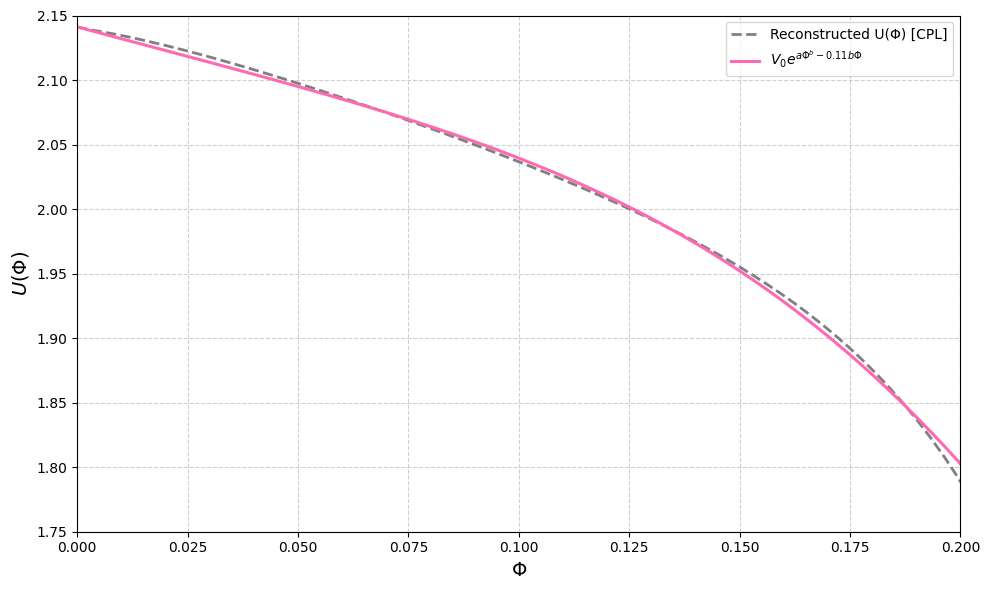

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit

# --- Data ---
phi_vals = phi_range
U_vals = U_of_phi["CPL"]

mask = (phi_vals > 1e-6) & (phi_vals <= 0.2)
z = phi_vals[mask]
y = U_vals[mask]
V0 = U_vals[np.argmin(phi_vals)]


# --- 2-parameter model --------------------------------------------
def U_pink_fixed(phi, a, b):
    return V0 * np.exp(a * phi**b -.11*b* phi)

# --- Fit -----------------------------------------------------------
p0 = [-1.0, 1.5]
popt, pcov = curve_fit(U_pink_fixed, z, y, p0=p0, maxfev=60000)
perr = np.sqrt(np.diag(pcov))
resid = y - U_pink_fixed(z, *popt)
chi2 = np.sum(resid**2)
dof = len(y) - len(popt)
chi2_red = chi2 / dof

print("\nFit for 2-parameter pink trial (fixed c)")
print(f"V0 = {V0:.6f} (fixed)")
#print(f"c = {c_fixed:.6e} (fixed)") # c_fixed is not defined, so this line is commented out
print(f"a = {popt[0]:.6e} ± {perr[0]:.2e}")
print(f"b = {popt[1]:.6e} ± {perr[1]:.2e}")
print(f"χ²_red = {chi2_red:.3e}")

# --- Plot ----------------------------------------------------------
plt.figure(figsize=(10,6))
plt.plot(phi_range, U_of_phi["CPL"], '--', color='gray', lw=2, label="Reconstructed U(Φ) [CPL]") # Plot using original phi_range and U_of_phi
plt.plot(phi_vals, U_pink_fixed(phi_vals, *popt), color='hotpink', lw=2.2,
         label=rf"$V_0 e^{{a\Phi^b  -0.11b\Phi}}$ ") # Fixed the syntax error here by escaping the backslash before Phi

plt.xlabel(r"$\Phi$", fontsize=14)
plt.ylabel(r"$U(\Phi)$", fontsize=14)
plt.xlim([0, 0.2])
plt.ylim([1.75, 2.15])
plt.grid(True, linestyle="--", alpha=0.6)
plt.legend(fontsize=10)
plt.tight_layout()
plt.show()

<>:50: SyntaxWarning: invalid escape sequence '\P'
<>:50: SyntaxWarning: invalid escape sequence '\P'
/tmp/ipython-input-1278622966.py:50: SyntaxWarning: invalid escape sequence '\P'
  label="Data reconstructed $U(\Phi)$")


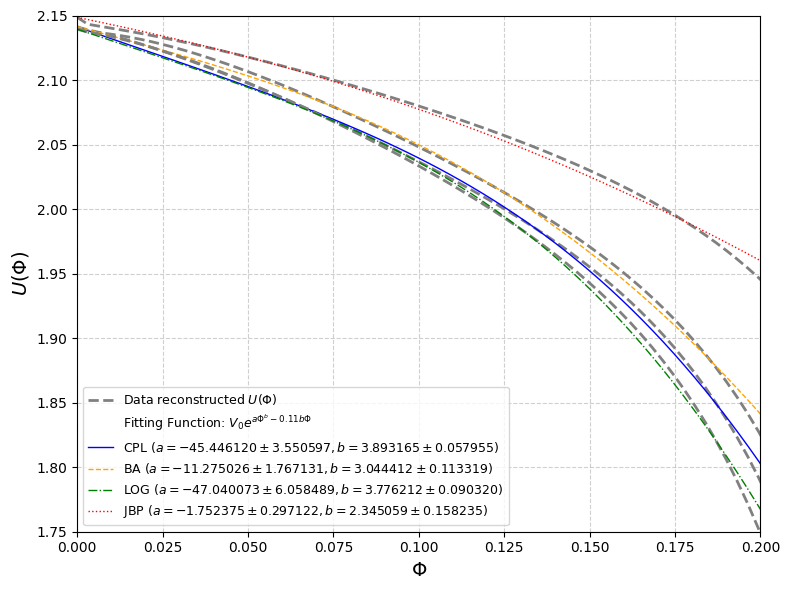


Fit Results for all models:
CPL: V0 = 2.141161 (fixed), a = -45.446120 ± 3.550597, b = 3.893165 ± 0.057955, χ²_red = 1.264e-05
BA: V0 = 2.141355 (fixed), a = -11.275026 ± 1.767131, b = 3.044412 ± 0.113319, χ²_red = 1.575e-05
LOG: V0 = 2.139423 (fixed), a = -47.040073 ± 6.058489, b = 3.776212 ± 0.090320, χ²_red = 2.161e-05
JBP: V0 = 2.148589 (fixed), a = -1.752375 ± 0.297122, b = 2.345059 ± 0.158235, χ²_red = 1.488e-05


In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit
from scipy.interpolate import interp1d

# --- Data ---
phi_vals = phi_range  # Assuming phi_range is defined
model_names = ["CPL", "BA", "LOG", "JBP"]
colors = {"CPL": "blue", "BA": "orange", "LOG": "green", "JBP": "red"}
styles = {"CPL": "solid", "BA": "dashed", "LOG": "dashdot", "JBP": "dotted"}

# --- 2-parameter model --------------------------------------------
def U_pink_fixed(phi, a, b):
    return V0 * np.exp(a * phi**b - 0.11 * b * phi)

fit_results = []

# --- Plot ---
plt.figure(figsize=(8, 6))

for i, model in enumerate(model_names):
    # Prepare data for the current model
    U_vals = U_of_phi[model]  # Assuming U_of_phi is a dict with model data
    mask = (phi_vals > 1e-6) & (phi_vals <= 0.2)
    z = phi_vals[mask]
    y = U_vals[mask]
    global V0  # V0 needs to be global for U_pink_fixed
    V0 = U_vals[np.argmin(phi_vals)]

    # --- Fit ---
    p0 = [-1.0, 1.5]
    popt, pcov = curve_fit(U_pink_fixed, z, y, p0=p0, maxfev=60000)
    perr = np.sqrt(np.diag(pcov))
    residuals = y - U_pink_fixed(z, *popt)
    chi2 = np.sum(residuals**2)
    dof = len(y) - len(popt)
    chi2_red = chi2 / dof

    fit_results.append({
        "model": model,
        "a": popt[0], "a_err": perr[0],
        "b": popt[1], "b_err": perr[1],
        "chi2_red": chi2_red,
        "V0": V0
    })

    # Plot reconstructed data (dashed gray), with legend only for the first model
    if i == 0:
        plt.plot(phi_vals, U_vals, linestyle='--', color='gray', lw=2,
                 label="Data reconstructed $U(\Phi)$")
        # Add dummy plot for fitting function right after reconstructed data
        plt.plot([], [], ' ', label=r"Fitting Function: $V_0 e^{a\Phi^b - 0.11b\Phi}$")
    else:
        plt.plot(phi_vals, U_vals, linestyle='--', color='gray', lw=2)

    # Plot fit with model-specific color and style
    latex_label = fr"{model} ($a={popt[0]:.6f}\pm{perr[0]:.6f}, b={popt[1]:.6f}\pm{perr[1]:.6f}$)"
    plt.plot(phi_vals, U_pink_fixed(phi_vals, *popt), color=colors[model], linestyle=styles[model], lw=1, label=latex_label)

plt.xlabel(r"$\Phi$", fontsize=14)
plt.ylabel(r"$U(\Phi)$", fontsize=14)
plt.xlim([0, 0.2])
plt.ylim([1.75, 2.15])
plt.grid(True, linestyle="--", alpha=0.6)
plt.legend(fontsize=9)
plt.tight_layout()
plt.show()

# Print results for all models
print("\nFit Results for all models:")
for r in fit_results:
    print(f"{r['model']}: V0 = {r['V0']:.6f} (fixed), a = {r['a']:.6f} ± {r['a_err']:.6f}, b = {r['b']:.6f} ± {r['b_err']:.6f}, χ²_red = {r['chi2_red']:.3e}")